# TAKE HOME PROBLEMS

## Wrangling the Billboard Top 100

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans


df = pd.read_csv('billboard.csv')
df.head()

Unnamed: 0                                                url    week_id  \
0           1  http://www.billboard.com/charts/hot-100/1965-0...  7/17/1965   
1           2  http://www.billboard.com/charts/hot-100/1965-0...  7/24/1965   
2           3  http://www.billboard.com/charts/hot-100/1965-0...  7/31/1965   
3           4  http://www.billboard.com/charts/hot-100/1965-0...   8/7/1965   
4           5  http://www.billboard.com/charts/hot-100/1965-0...  8/14/1965   

   week_position                    song   performer  \
0             34  Don't Just Stand There  Patty Duke   
1             22  Don't Just Stand There  Patty Duke   
2             14  Don't Just Stand There  Patty Duke   
3             10  Don't Just Stand There  Patty Duke   
4              8  Don't Just Stand There  Patty Duke   

                            song_id  instance  previous_week_position  \
0  Don't Just Stand TherePatty Duke         1                    45.0   
1  Don't Just Stand TherePatty Duke         1                    34.0   
2  Don't Just Stand TherePatty Duke         1                    22.0   
3  Don't Just Stand TherePatty Duke         1                    14.0   
4  Don't Just Stand TherePatty Duke         1                    10.0   

   peak_position  weeks_on_chart  year  week  
0             34               4  1965    29  
1             22               5  1965    30  
2             14               6  1965    31  
3             10               7  1965    32  
4              8               8  1965    33

### Part A: top 10 most popular songs since 1958, as measured by the total number of weeks that a song spent on the Billboard Top 100.

In [102]:
keep = ['performer', 'song', 'year', 'week', 'week_position']
part_A = df[keep]
#part_A

weeks = part_A.groupby('song')['week'].max().reset_index()

weeks_df = pd.merge(weeks, part_A[['performer', 'song', 'week']], on=['song','week'], how='left')
weeks_df.rename(columns={'week': 'count'}, inplace=True)
#weeks_df

weeks_df = weeks_df.sort_values(by='count', ascending=False)
weeks_df[:10]       

song  count  \
6299                           Foolin' Around     53   
6210                          Flava In Ya Ear     53   
18091                             Single Girl     53   
24604  You've Got To Take It (If You Want It)     53   
24584                          You're Welcome     53   
75           (I Could Only) Whisper Your Name     53   
125          (Let's Do) The Hully Gully Twist     53   
24647                      Young, Wild & Free     53   
6267                           Foldin Clothes     53   
18030                          Silly Wasn't I     53   

                                           performer  
6299                                  Changing Faces  
6210                                      Craig Mack  
18091                                    Sandy Posey  
24604                            The Main Ingredient  
24584                                 Dwayne Johnson  
75                                Harry Connick, Jr.  
125                                     Bill Doggett  
24647  Snoop Dogg & Wiz Khalifa Featuring Bruno Mars  
6267                                         J. Cole  
18030                                Valerie Simpson

### Part B: Plot the measure of musical diversity over the years

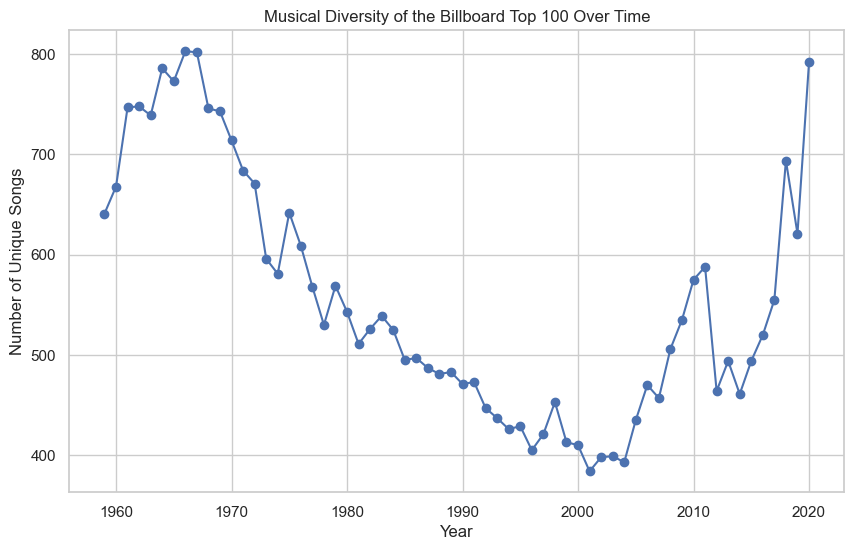

In [104]:
import matplotlib.pyplot as plt

filter = df[(df['year'] != 1958) & (df['year'] != 2021)]

diversity_per_year = filter.groupby('year')['song'].nunique().reset_index()

diversity_per_year.columns = ['year', 'unique_songs']

plt.figure(figsize=(10, 6))
plt.plot(diversity_per_year['year'], diversity_per_year['unique_songs'], marker='o')
plt.title('Musical Diversity of the Billboard Top 100 Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Unique Songs')
plt.grid(True)
plt.show()


### Part C: ten-week hit

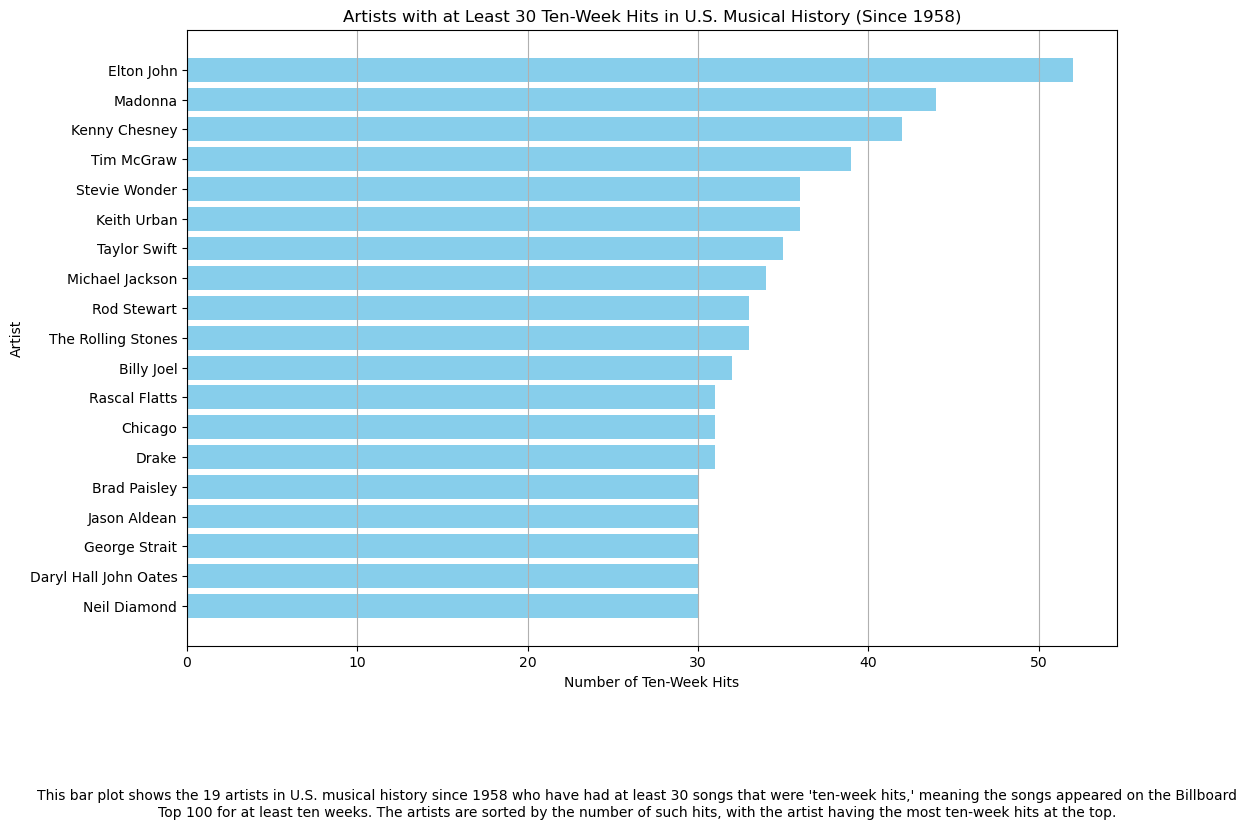

In [5]:
ten_week_hits = df[df['weeks_on_chart'] >= 10]

ten_week_hits_count = ten_week_hits.groupby('performer')['song'].nunique().reset_index()

top_artists = ten_week_hits_count[ten_week_hits_count['song'] >= 30]

top_artists = top_artists.sort_values(by='song', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(top_artists['performer'], top_artists['song'], color='skyblue')
plt.title('Artists with at Least 30 Ten-Week Hits in U.S. Musical History (Since 1958)')
plt.xlabel('Number of Ten-Week Hits')
plt.ylabel('Artist')
plt.gca().invert_yaxis() 
plt.grid(True, axis='x')

caption = ("This bar plot shows the 19 artists in U.S. musical history since 1958 who have had "
           "at least 30 songs that were 'ten-week hits,' meaning the songs appeared on the Billboard "
           "Top 100 for at least ten weeks. The artists are sorted by the number of such hits, with the "
           "artist having the most ten-week hits at the top.")

plt.figtext(0.5, -0.1, caption, wrap=True, horizontalalignment='center', fontsize=10)
plt.show()

## Visual story telling part 1: green buildings

In [6]:
green_blg = pd.read_csv('greenbuildings.csv')
green_blg

CS_PropertyID  cluster     size  empl_gr    Rent  leasing_rate  stories  \
0            379105        1   260300     2.22   38.56         91.39       14   
1            122151        1    67861     2.22   28.57         87.14        5   
2            379839        1   164848     2.22   33.31         88.94       13   
3             94614        1    93372     2.22   35.00         97.04       13   
4            379285        1   174307     2.22   40.69         96.58       16   
...             ...      ...      ...      ...     ...           ...      ...   
7889         157117     1230  1300000     1.15  137.51        100.00       41   
7890         158379     1230    16140     1.15  152.73         75.22        8   
7891          52316     1230    15726     1.15  158.92        100.00        6   
7892         158124     1230    51300     1.15  198.99        100.00       12   
7893         157086     1230  1876972     1.15  250.00         99.84       45   

      age  renovated  class_a  ...  green_rating  net  amenities  cd_total_07  \
0      16          0        1  ...             1    0          1         4988   
1      27          0        0  ...             0    0          1         4988   
2      36          1        0  ...             0    0          1         4988   
3      46          1        0  ...             0    0          0         4988   
4       5          0        1  ...             0    0          1         4988   
...   ...        ...      ...  ...           ...  ...        ...          ...   
7889   35          0        1  ...             0    0          0         1299   
7890   90          1        0  ...             0    0          0         1299   
7891   67          0        0  ...             0    0          0         1299   
7892   91          0        0  ...             0    0          0         1299   
7893   34          1        1  ...             0    0          1         1299   

      hd_total07  total_dd_07  Precipitation  Gas_Costs  Electricity_Costs  \
0             58         5046          42.57   0.013700           0.029000   
1             58         5046          42.57   0.013731           0.029045   
2             58         5046          42.57   0.013731           0.029045   
3             58         5046          42.57   0.013731           0.029045   
4             58         5046          42.57   0.013731           0.029045   
...          ...          ...            ...        ...                ...   
7889        4796         6095          48.35   0.011757           0.045457   
7890        4796         6095          48.35   0.011757           0.045457   
7891        4796         6095          48.35   0.011757           0.045457   
7892        4796         6095          48.35   0.011757           0.045457   
7893        4796         6095          48.35   0.011757           0.045457   

      cluster_rent  
0            36.78  
1            36.78  
2            36.78  
3            36.78  
4            36.78  
...            ...  
7889         58.72  
7890         58.72  
7891         58.72  
7892         58.72  
7893         58.72  

[7894 rows x 23 columns]

In [13]:
print(green_blg.describe())

       CS_PropertyID      cluster          size      empl_gr         Rent  \
count   7.894000e+03  7894.000000  7.894000e+03  7820.000000  7894.000000   
mean    4.530025e+05   588.615024  2.346377e+05     3.206720    28.418569   
std     7.434053e+05   399.907509  2.975334e+05     8.162989    15.075483   
min     1.000000e+00     1.000000  1.624000e+03   -24.950000     2.980000   
25%     1.574520e+05   272.000000  5.089125e+04     1.740000    19.500000   
50%     3.132530e+05   476.000000  1.288380e+05     1.970000    25.160000   
75%     4.411885e+05  1044.000000  2.942120e+05     2.380000    34.180000   
max     6.208103e+06  1230.000000  3.781045e+06    67.780000   250.000000   

       leasing_rate      stories          age    renovated      class_a  ...  \
count   7894.000000  7894.000000  7894.000000  7894.000000  7894.000000  ...   
mean      82.606371    13.584495    47.243983     0.379529     0.399924  ...   
std       21.380315    12.287083    32.194393     0.485300     0.4

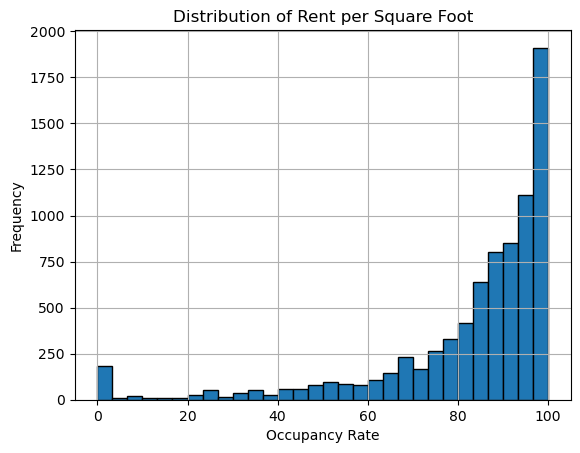

In [18]:
green_blg['leasing_rate'].hist(bins=30, edgecolor='black')
plt.title('Distribution of Rent per Square Foot')
plt.xlabel('Occupancy Rate')
plt.ylabel('Frequency')
plt.show()

#### As mentioned by the developer, there are a number of observations with very low occupacy, so I removed those as well. 

In [23]:
green_blg = green_blg[green_blg['leasing_rate'] >= 20]

Now, I will plot every column to see their distribution and gain a better understanding of the nature of each variable

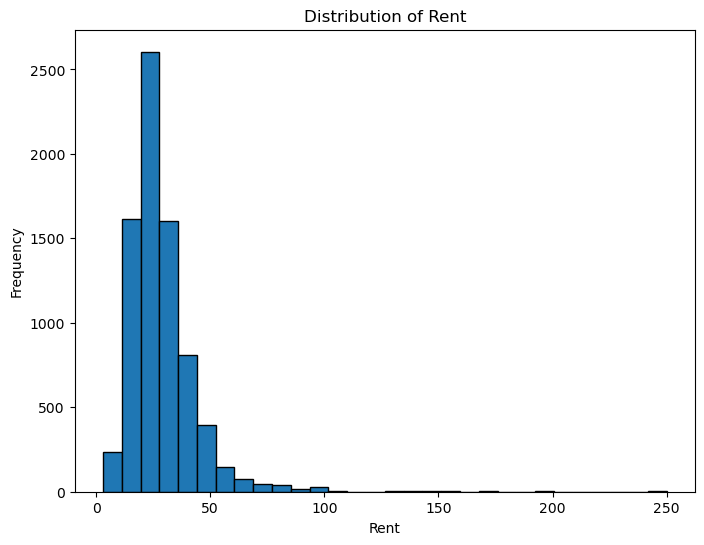

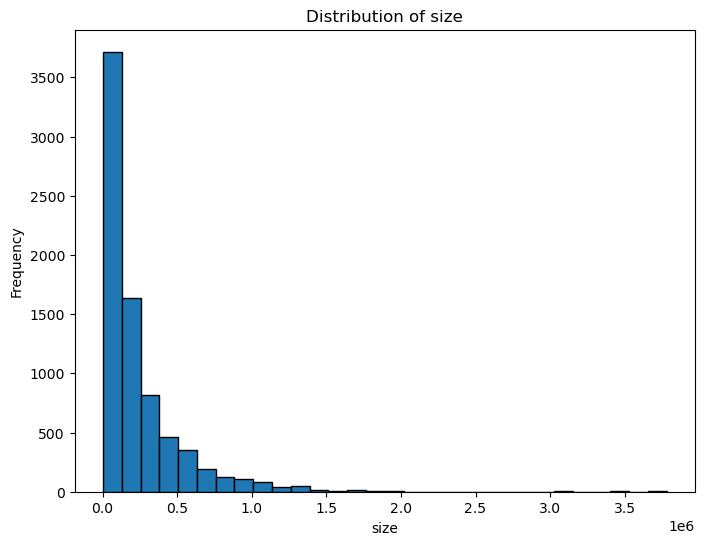

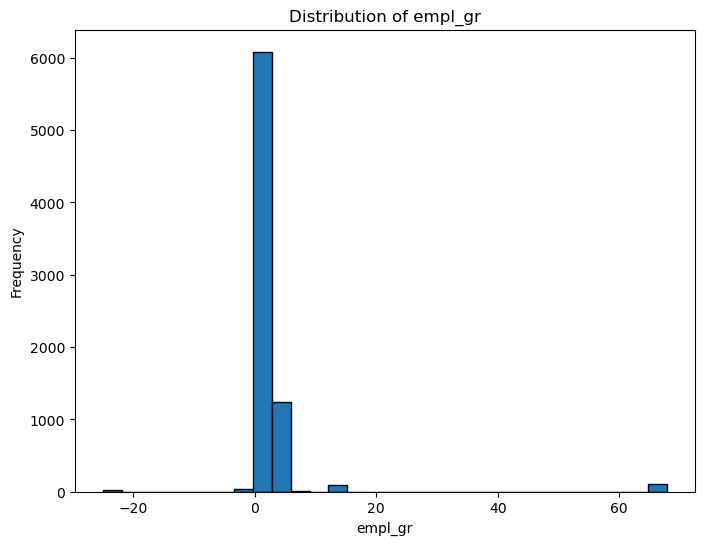

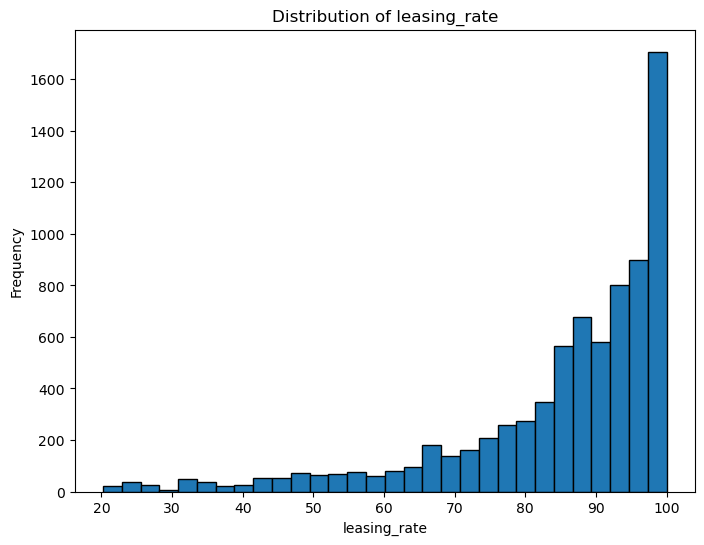

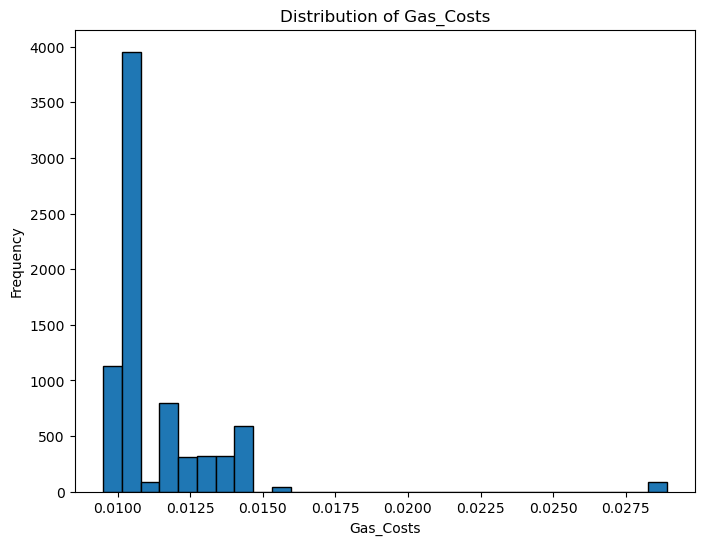

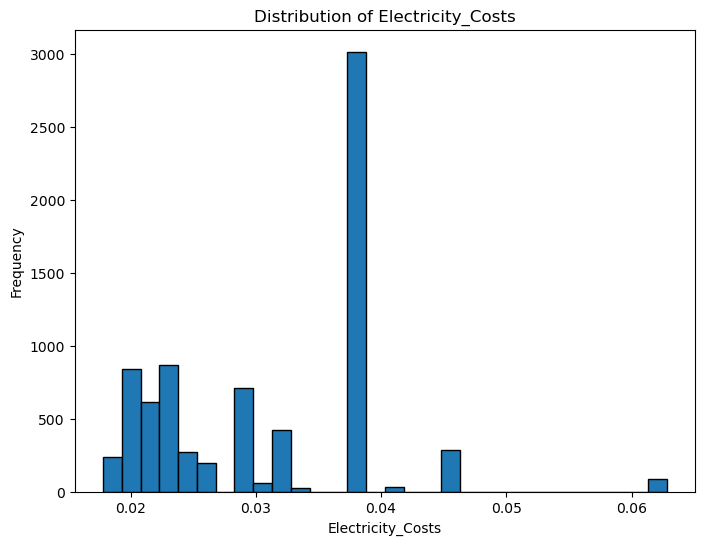

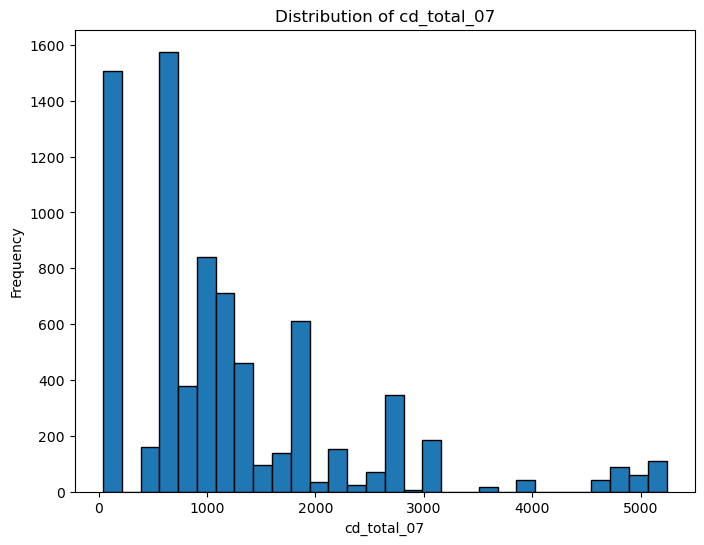

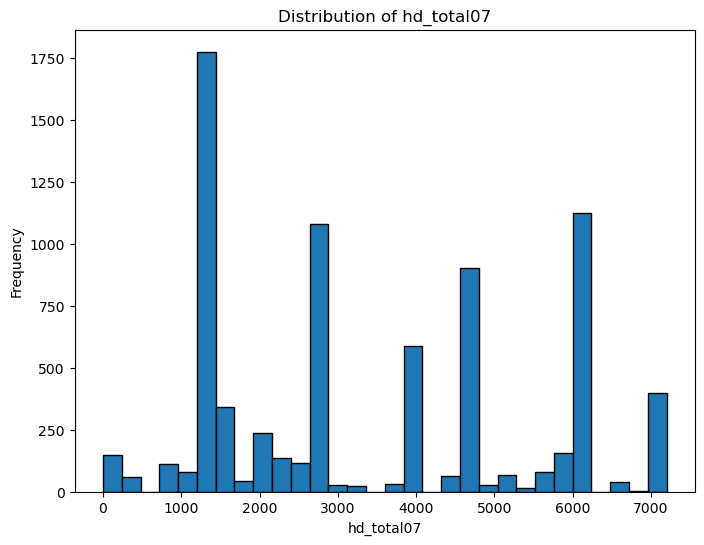

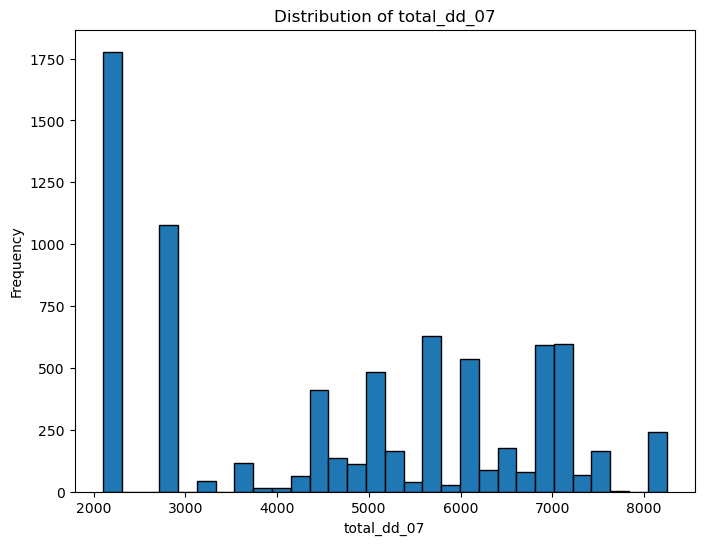

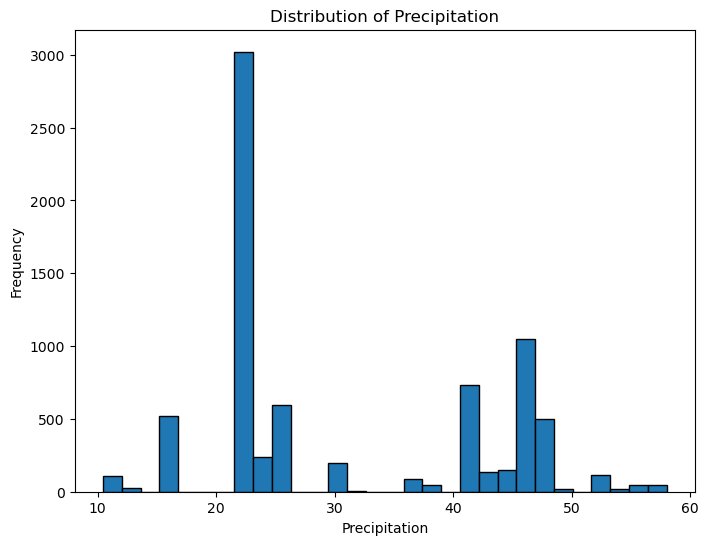

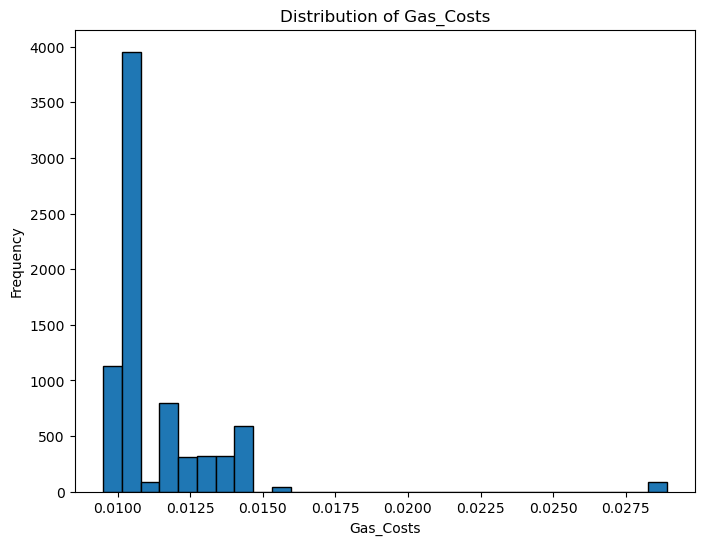

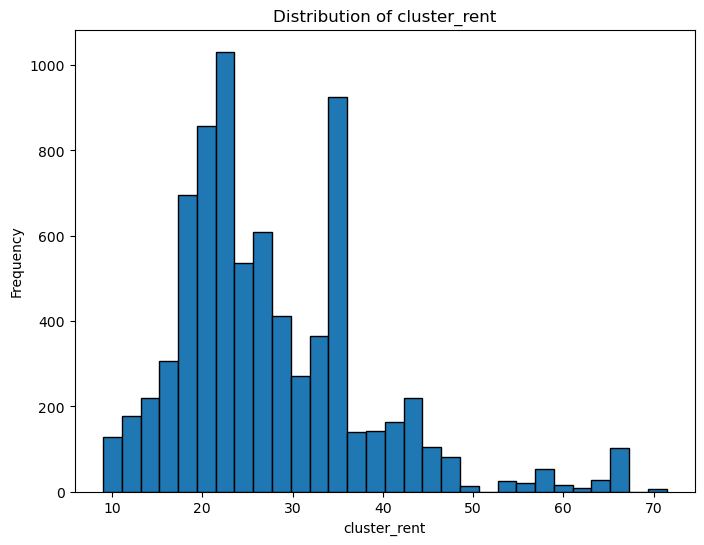

In [24]:
continuous_vars = ['Rent', 'size', 'empl_gr', 'leasing_rate', 'Gas_Costs', 
                   'Electricity_Costs', 'cd_total_07', 'hd_total07', 'total_dd_07', 
                   'Precipitation', 'Gas_Costs', 'cluster_rent']
for var in continuous_vars:
    plt.figure(figsize=(8, 6))
    plt.hist(green_blg[var].dropna(), bins=30, edgecolor='k')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()						

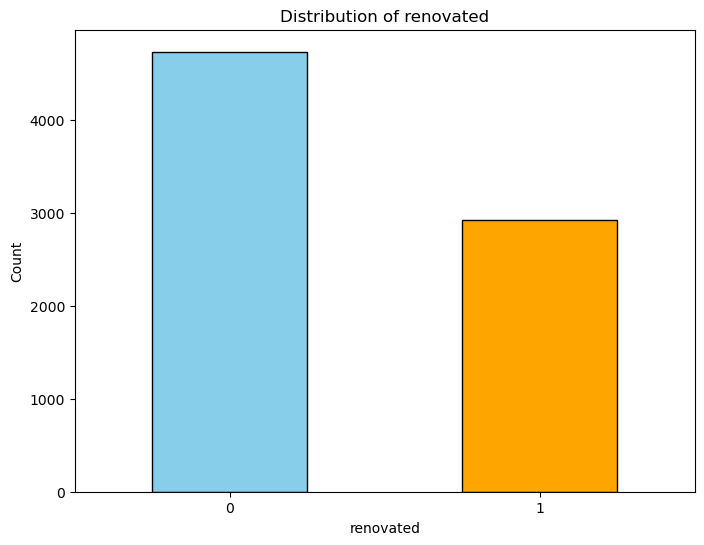

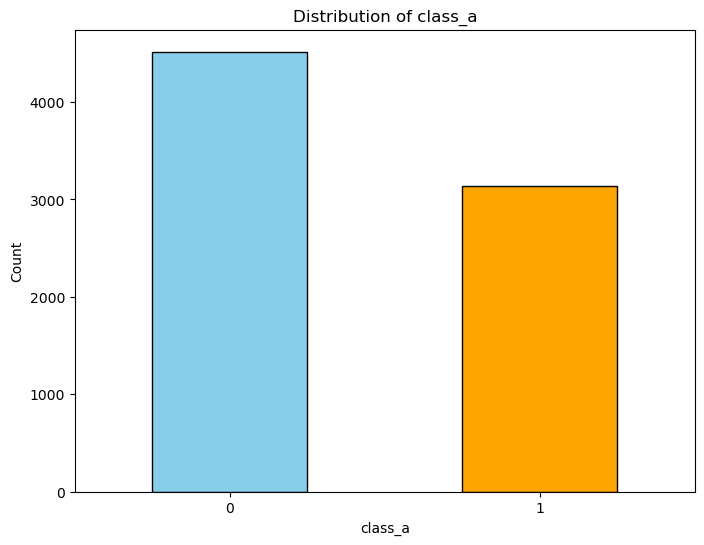

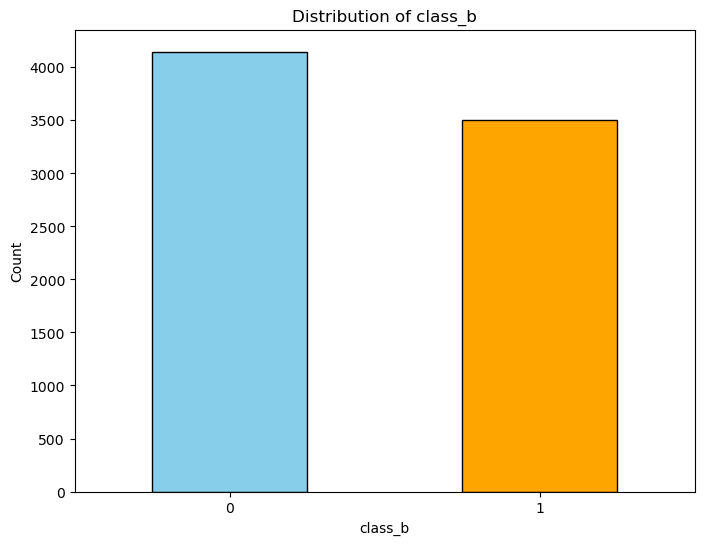

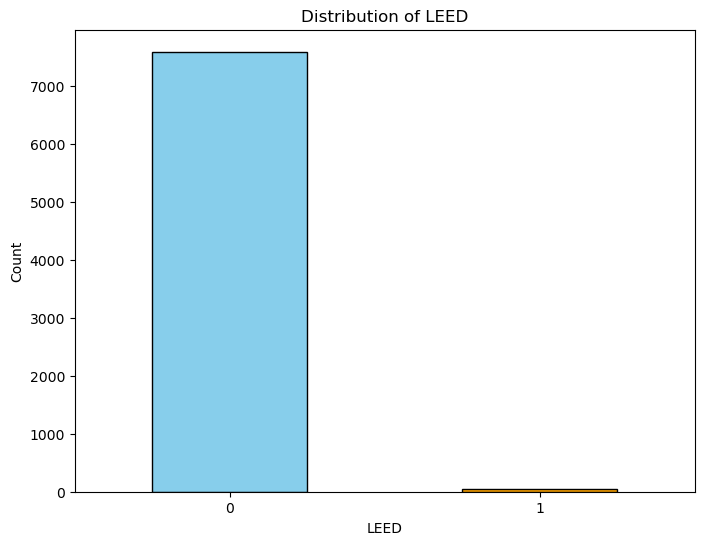

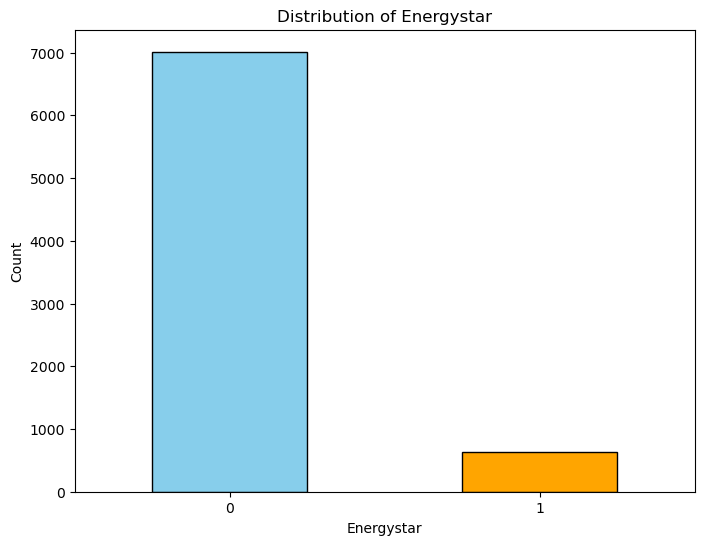

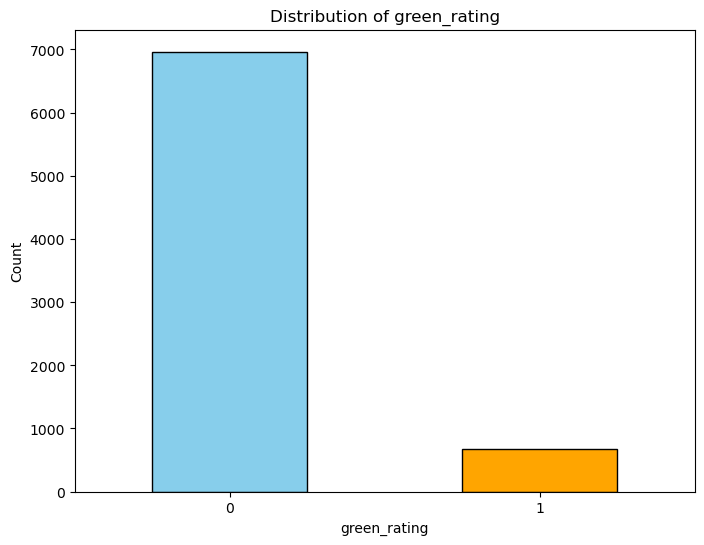

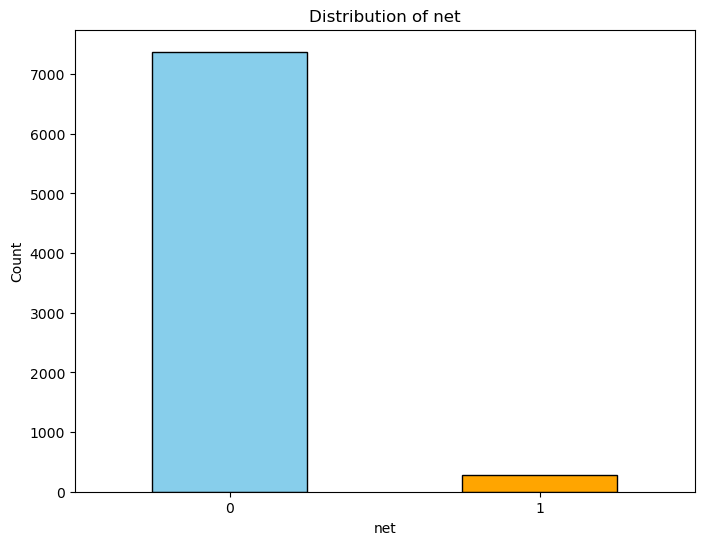

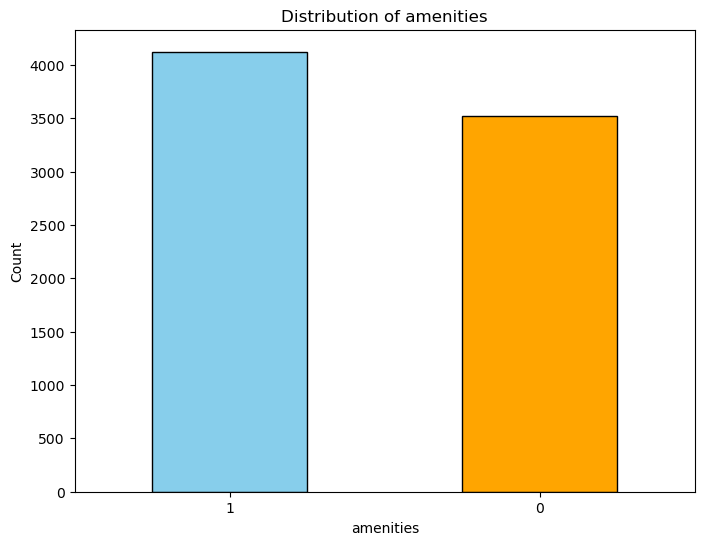

In [27]:
binary_columns = ['renovated', 'class_a', 'class_b', 'LEED', 'Energystar', 'green_rating', 'net', 'amenities']

# Create bar plots for each binary column
for col in binary_columns:
    plt.figure(figsize=(8, 6))
    green_blg[col].value_counts().plot(kind='bar', color=['skyblue', 'orange'], edgecolor='k')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=0)  # Keep x-axis labels horizontal
    plt.show()


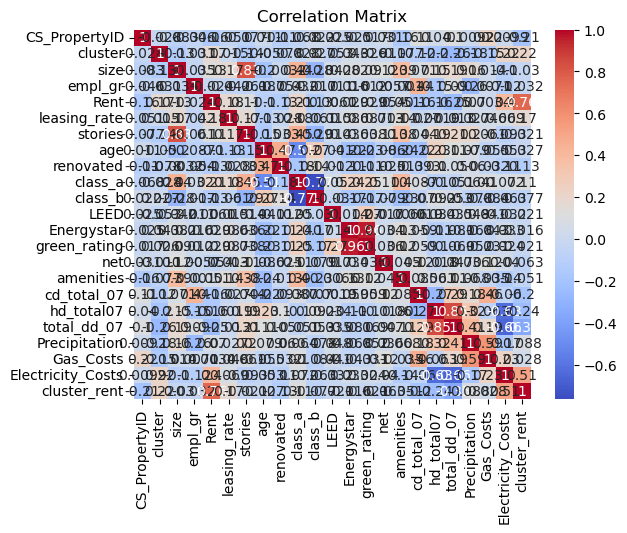

In [25]:
corr_matrix = green_blg.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

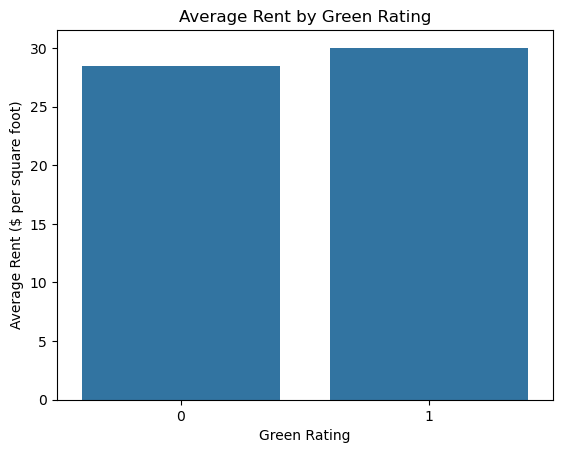

In [29]:
avg_rent_by_green = green_blg.groupby('green_rating')['Rent'].mean().reset_index()

sns.barplot(x='green_rating', y='Rent', data=avg_rent_by_green)
plt.title('Average Rent by Green Rating')
plt.xlabel('Green Rating')
plt.ylabel('Average Rent ($ per square foot)')
plt.show()


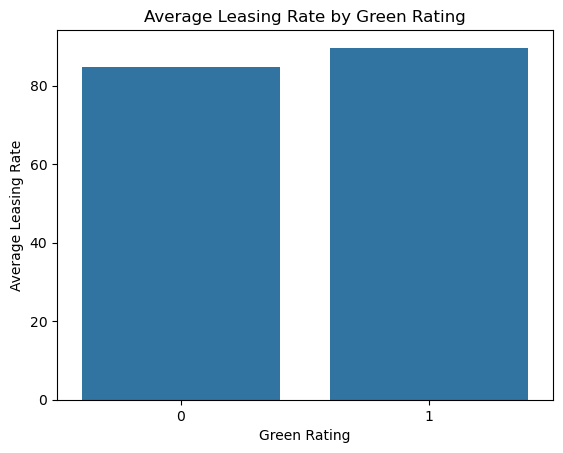

In [32]:
avg_lease_rate_by_green = green_blg.groupby('green_rating')['leasing_rate'].mean().reset_index()

sns.barplot(x='green_rating', y='leasing_rate', data=avg_lease_rate_by_green)
plt.title('Average Leasing Rate by Green Rating')
plt.xlabel('Green Rating')
plt.ylabel('Average Leasing Rate')
plt.show()


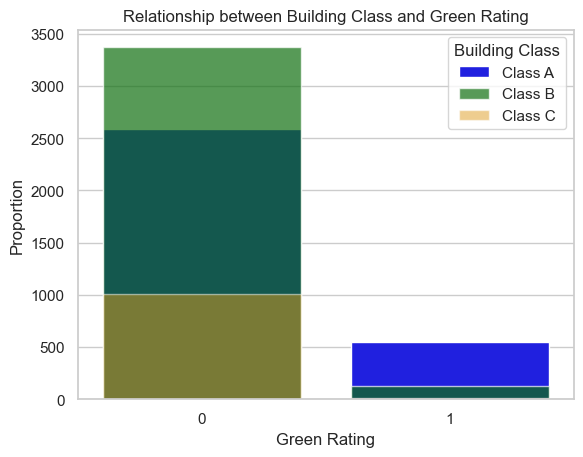

In [112]:
class_a_green = green_blg[green_blg['class_a'] == 1]['green_rating'].value_counts().rename('Class A')
class_b_green = green_blg[green_blg['class_b'] == 1]['green_rating'].value_counts().rename('Class B')
class_c_green = green_blg[(green_blg['class_a'] == 0) & (green_blg['class_b'] == 0)]['green_rating'].value_counts().rename('Class C')

plot_data = pd.concat([class_a_green, class_b_green, class_c_green], axis=1).fillna(0).reset_index()

plot_data.rename(columns={'index': 'green_rating'}, inplace=True)

sns.barplot(x='green_rating', y='Class A', data=plot_data, color='blue', label='Class A')
sns.barplot(x='green_rating', y='Class B', data=plot_data, color='green', label='Class B', alpha=0.7)
sns.barplot(x='green_rating', y='Class C', data=plot_data, color='orange', label='Class C', alpha=0.5)

plt.xlabel('Green Rating')
plt.ylabel('Proportion')
plt.title('Relationship between Building Class and Green Rating')
plt.legend(title='Building Class')
plt.show()


#### after analyzing the data through vizualization, I arrived to the following conclusions:
- Slightly Higher Rent: While the increase in rent is modest, it indicates that tenants are willing to pay a bit more for green-certified spaces.
- Higher Leasing Rate: A higher leasing rate implies that green buildings are more attractive to tenants, which could lead to lower vacancy rates and more consistent cash flows.
- Class A Quality: Green certification could position the building in the highest-quality tier (Class A), making it more competitive in the market.
- Tenant Appeal: Given the growing emphasis on sustainability, particularly in urban areas like Austin, the building might appeal to environmentally conscious tenants, potentially increasing demand.

Conclusion: From an economic perspective, the 5% premium for green certification appears justifiable. The higher leasing rate and the potential for Class A status suggest that the building will likely have a strong market position, with the possibility of reducing vacancy rates and maintaining stable cash flows.

## Visual story telling part 2: Capital Metro data

In [33]:
capmetro = pd.read_csv('capmetro_UT.csv')
capmetro

timestamp  boarding  alighting day_of_week  temperature  \
0     2018-09-01 06:00:00         0          1         Sat        74.82   
1     2018-09-01 06:15:00         2          1         Sat        74.82   
2     2018-09-01 06:30:00         3          4         Sat        74.82   
3     2018-09-01 06:45:00         3          4         Sat        74.82   
4     2018-09-01 07:00:00         2          4         Sat        74.39   
...                   ...       ...        ...         ...          ...   
5819  2018-11-30 20:45:00        43         29         Fri        70.73   
5820  2018-11-30 21:00:00        24         19         Fri        69.88   
5821  2018-11-30 21:15:00        33         16         Fri        69.88   
5822  2018-11-30 21:30:00        25         15         Fri        69.88   
5823  2018-11-30 21:45:00        21         13         Fri        69.88   

      hour_of_day month  weekend  
0               6   Sep  weekend  
1               6   Sep  weekend  
2               6   Sep  weekend  
3               6   Sep  weekend  
4               7   Sep  weekend  
...           ...   ...      ...  
5819           20   Nov  weekday  
5820           21   Nov  weekday  
5821           21   Nov  weekday  
5822           21   Nov  weekday  
5823           21   Nov  weekday  

[5824 rows x 8 columns]

<Figure size 1400x1000 with 0 Axes>

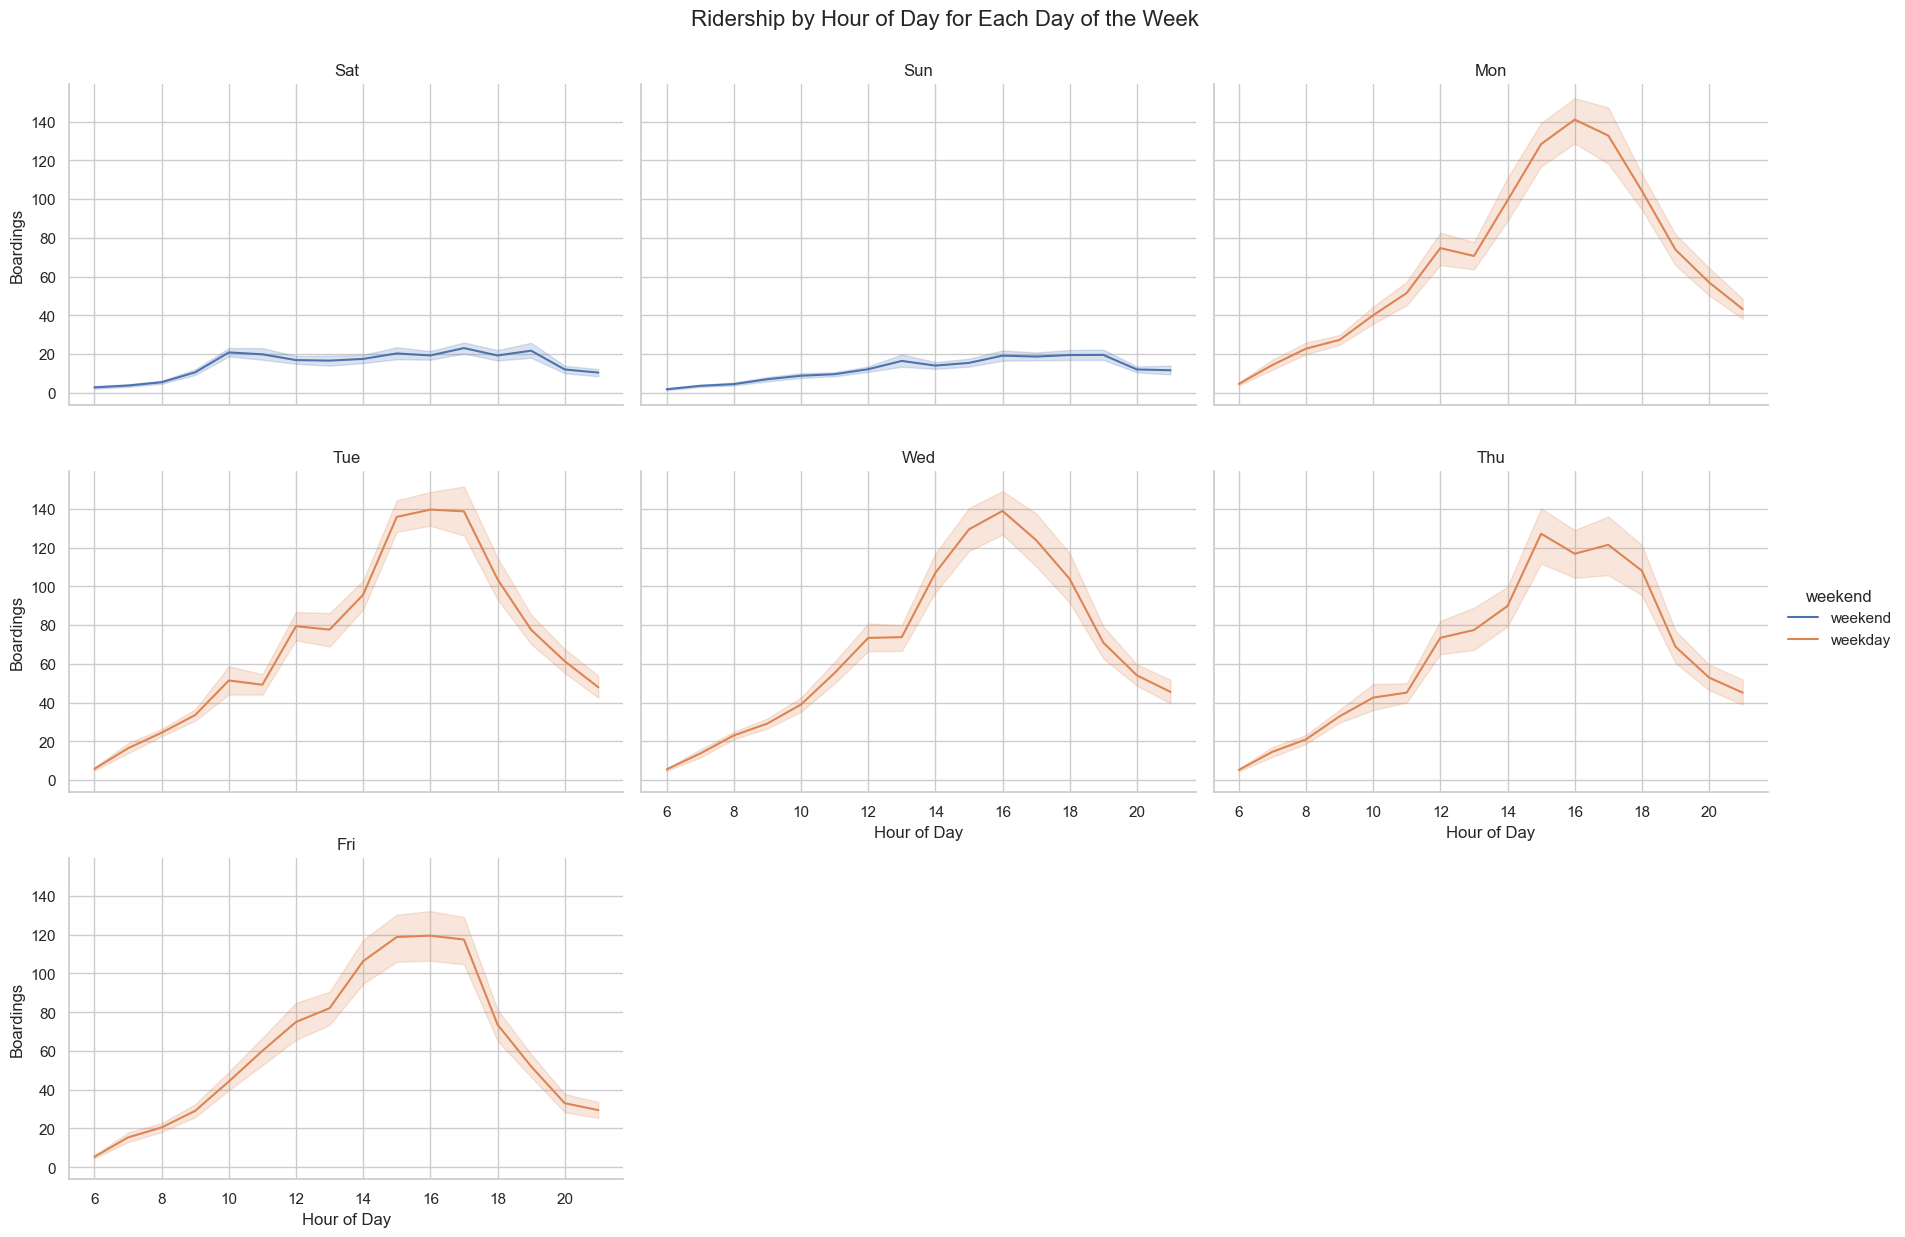

<Figure size 1400x1000 with 0 Axes>

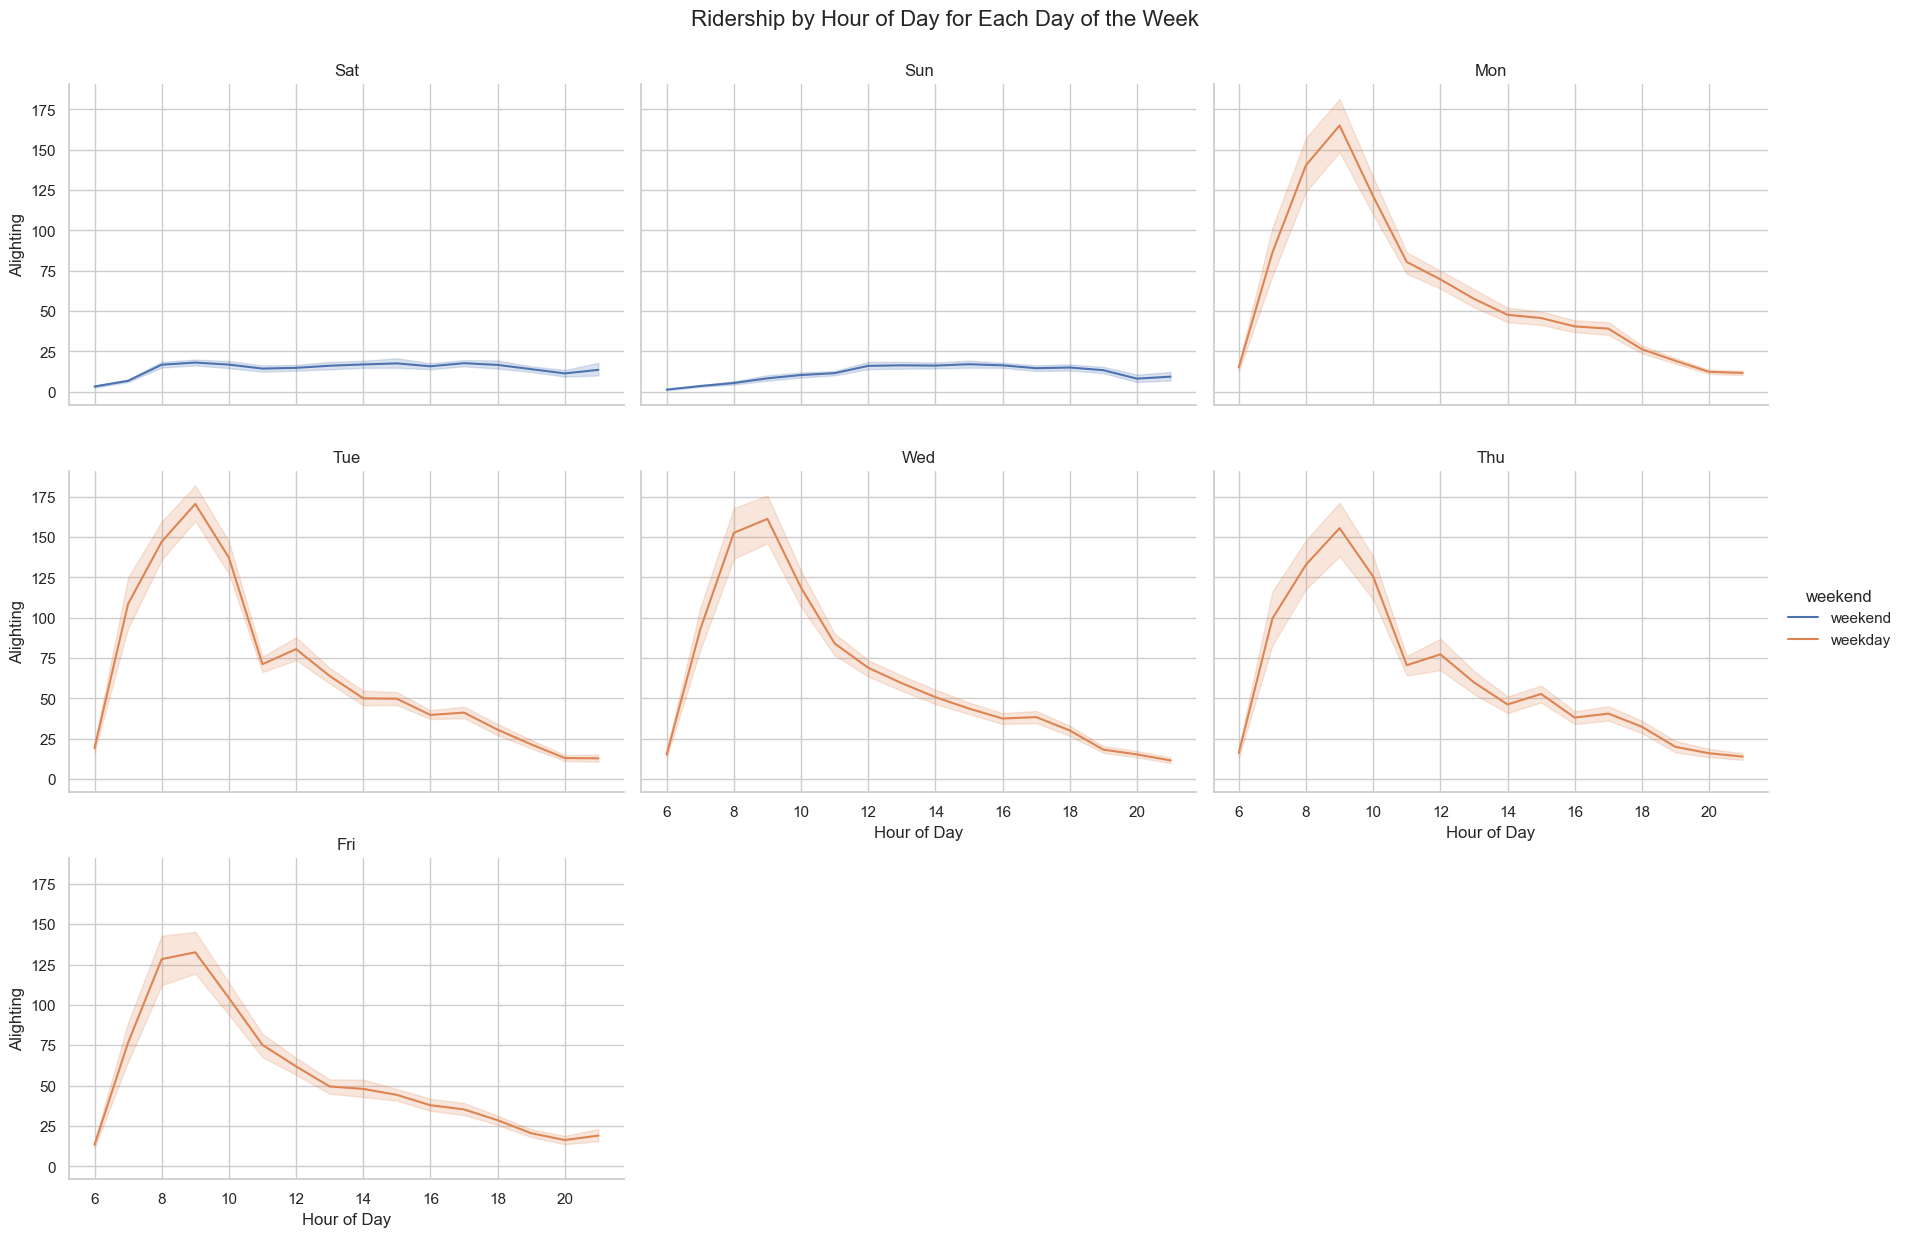

In [113]:
plt.figure(figsize=(14, 10))

g = sns.FacetGrid(capmetro, col="day_of_week", hue="weekend", col_wrap=3, height=4, aspect=1.5)
g.map(sns.lineplot, "hour_of_day", "boarding")
g.add_legend()
g.set_axis_labels("Hour of Day", "Boardings")
g.set_titles("{col_name}")
g.fig.suptitle("Ridership by Hour of Day for Each Day of the Week", fontsize=16, y=1.03)

plt.show()

#####################
plt.figure(figsize=(14, 10))

g = sns.FacetGrid(capmetro, col="day_of_week", hue="weekend", col_wrap=3, height=4, aspect=1.5)
g.map(sns.lineplot, "hour_of_day", "alighting")
g.add_legend()
g.set_axis_labels("Hour of Day", "Alighting")
g.set_titles("{col_name}")
g.fig.suptitle("Ridership by Hour of Day for Each Day of the Week", fontsize=16, y=1.03)

plt.show()

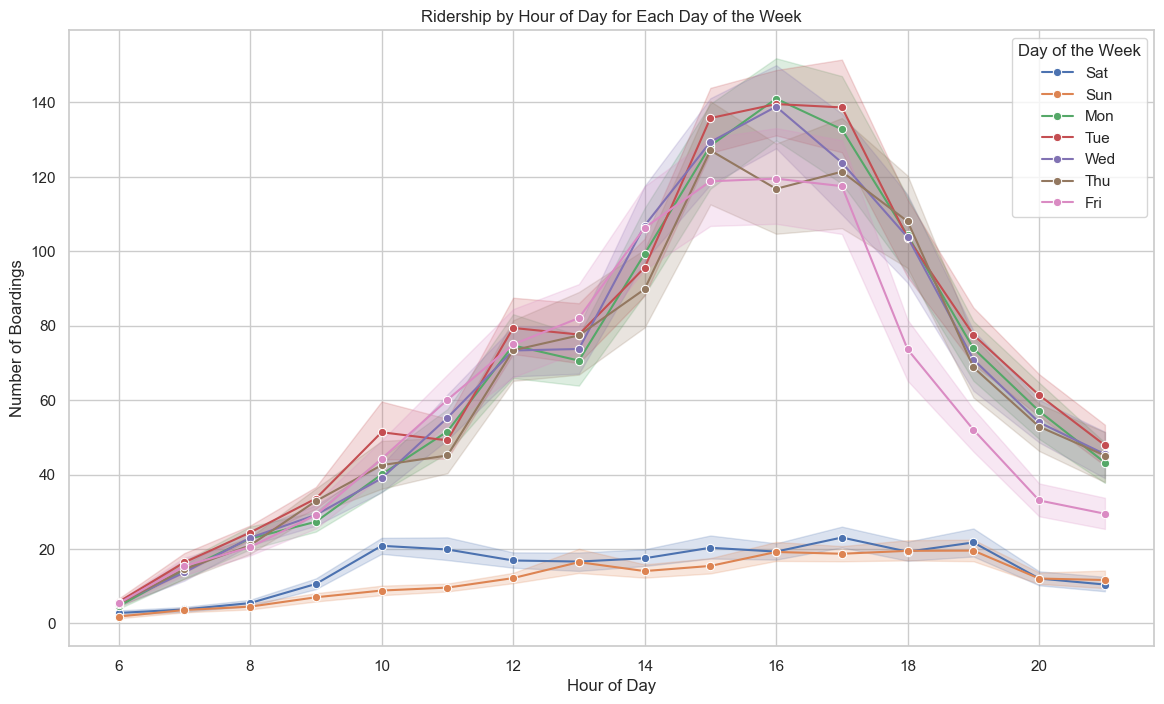

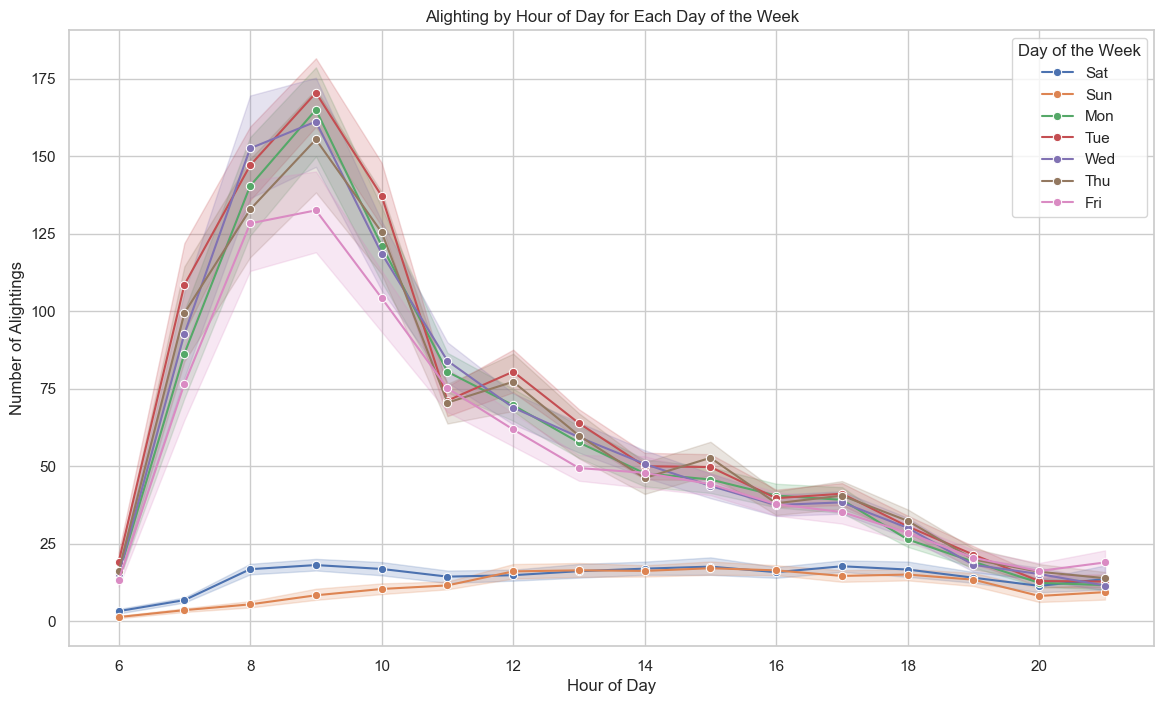

In [114]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=capmetro, x='hour_of_day', y='boarding', hue='day_of_week', marker="o")
plt.title('Ridership by Hour of Day for Each Day of the Week')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Boardings')
plt.legend(title='Day of the Week')
plt.grid(True)
plt.show()

###########################
plt.figure(figsize=(14, 8))
sns.lineplot(data=capmetro, x='hour_of_day', y='alighting', hue='day_of_week', marker="o")
plt.title('Alighting by Hour of Day for Each Day of the Week')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Alightings')
plt.legend(title='Day of the Week')
plt.grid(True)
plt.show()

- Ridership by Hour of Day: The first plot will show how the number of people boarding the bus varies throughout the day, separated by the day of the week.
- Alighting by Hour of Day: The second plot will show how the number of people getting off the bus varies throughout the day, again separated by the day of the week.

It can be infered that there is a higher number of alightings during the morning from Monday-Friday due to students arriving to class and I higher number of boardings during the afternoon due to classes being done and students returning home. On the other hand, there is a small number of both boardings and alightings during the weekend due students not having classes and therefore only going to campus based on some need such as meeting up group for a project.  

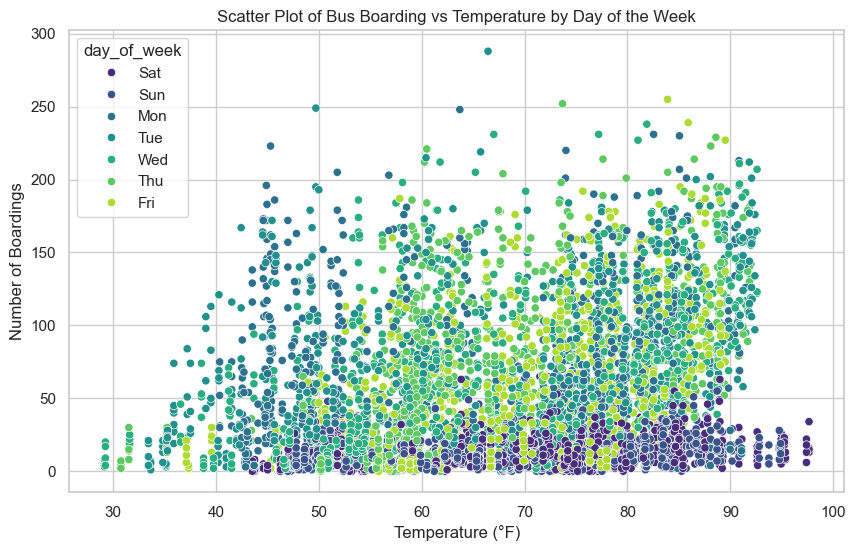

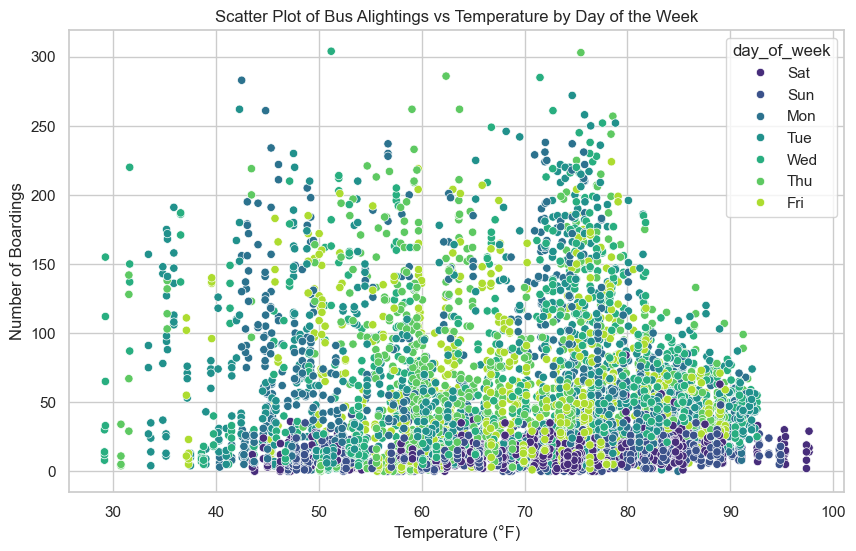

In [116]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temperature', y='boarding', hue='day_of_week', data=capmetro, palette='viridis')

plt.title('Scatter Plot of Bus Boarding vs Temperature by Day of the Week')
plt.xlabel('Temperature (°F)')
plt.ylabel('Number of Boardings')

plt.show()

################
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temperature', y='alighting', hue='day_of_week', data=capmetro, palette='viridis')

plt.title('Scatter Plot of Bus Alightings vs Temperature by Day of the Week')
plt.xlabel('Temperature (°F)')
plt.ylabel('Number of Boardings')

plt.show()

As seen by the scatter plot temperature doesn't really have an effect on number of Boardings 

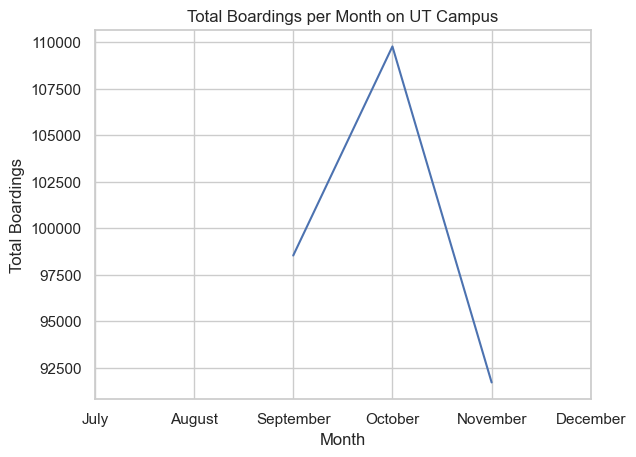

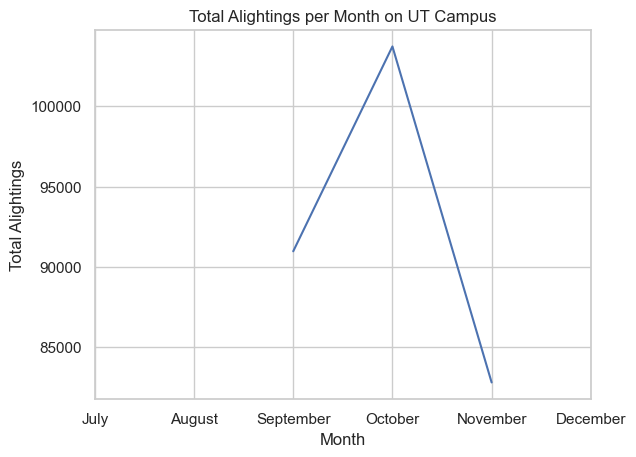

In [121]:
capmetro['timestamp'] = pd.to_datetime(capmetro['timestamp'])
capmetro['month'] = capmetro['timestamp'].dt.month

monthly_boardings = capmetro.groupby('month')['boarding'].sum().reset_index()

sns.lineplot(data=monthly_boardings, x='month', y='boarding')
plt.xlabel('Month')
plt.ylabel('Total Boardings')
plt.title('Total Boardings per Month on UT Campus')
plt.xticks([7, 8, 9, 10, 11, 12], ['July', 'August', 'September', 'October', 'November', 'December'])
plt.show()

##############

monthly_boardings = capmetro.groupby('month')['alighting'].sum().reset_index()

sns.lineplot(data=monthly_boardings, x='month', y='alighting')
plt.xlabel('Month')
plt.ylabel('Total Alightings')
plt.title('Total Alightings per Month on UT Campus')
plt.xticks([7, 8, 9, 10, 11, 12], ['July', 'August', 'September', 'October', 'November', 'December'])
plt.show()


Interpretation: 
- August and September: start of the academic year. Students are returning to campus, and bus ridership typically increases as people establish their routines.
- October (Peak): By this time, classes are fully underway, students are settled in, and there may be a higher frequency of events, activities. In addition, October is often a time for midterms which might require more students to be on campus. 
- November and December: time of holidays and breaks (like Thanksgiving), where fewer students might be on campus, resulting in decreased boardings/alightings.

In conclusion, ridership of the bus is mainly affected by day and time of the day as well as month of the year. 

## Clustering and dimensionality reduction

In [5]:
wine = pd.read_csv('wine.csv')
wine

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  color  
0         9.4        5    red  
1         9.8        5    red  
2         9.8        5    red  
3         9.8        6    red  
4         9.4        5    red  
...       ...      ...    ...  
6492     11.2        6  white  
6493      9.6        5  white  
6494      9.4        6  white  
6495     12.8        7  white  
6496     11.8        6  white  

[6497 rows x 13 columns]

In [74]:
wine_cleaned = wine.dropna()
wine_cleaned = wine_cleaned.drop('color', axis=1)

scaler = StandardScaler()
standardized_data = scaler.fit_transform(wine_cleaned)

pca = PCA()
pca.fit(standardized_data)

PCA()

In [69]:
explained_variance = pca.explained_variance_ratio_
explained_variance_list = list(enumerate(explained_variance, start=1))

for component, variance in explained_variance_list:
    print(f'Principal Component {component}: {variance:.4f}')


Principal Component 1: 0.2535
Principal Component 2: 0.2208
Principal Component 3: 0.1368
Principal Component 4: 0.0891
Principal Component 5: 0.0700
Principal Component 6: 0.0550
Principal Component 7: 0.0470
Principal Component 8: 0.0430
Principal Component 9: 0.0382
Principal Component 10: 0.0249
Principal Component 11: 0.0190
Principal Component 12: 0.0027


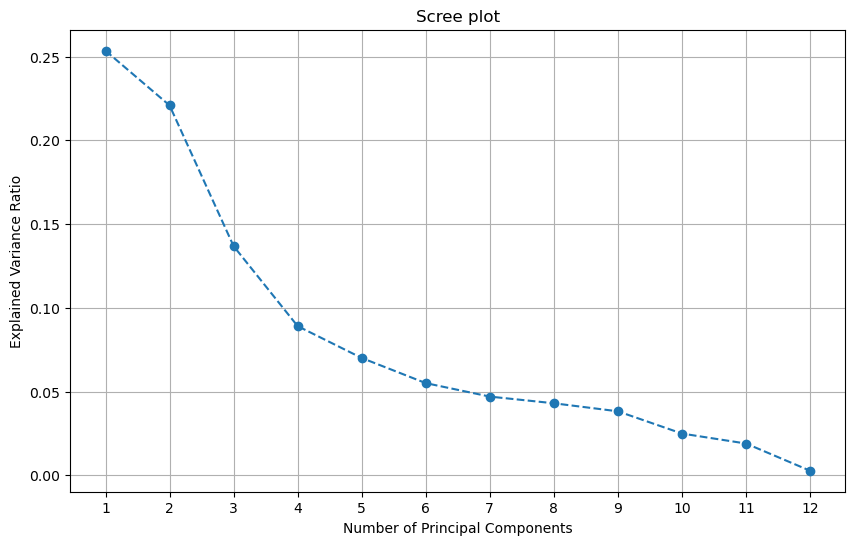

In [70]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Scree plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid()
plt.show()

In [71]:
cumulative_variance = np.cumsum(explained_variance)
cumulative_variance_list = list(enumerate(cumulative_variance, start=1))

for component, variance in cumulative_variance_list:
    print(f'Principal Component {component}: {variance:.4f}')


Principal Component 1: 0.2535
Principal Component 2: 0.4743
Principal Component 3: 0.6111
Principal Component 4: 0.7001
Principal Component 5: 0.7702
Principal Component 6: 0.8252
Principal Component 7: 0.8722
Principal Component 8: 0.9152
Principal Component 9: 0.9534
Principal Component 10: 0.9783
Principal Component 11: 0.9973
Principal Component 12: 1.0000


In [72]:
components = pca.components_
print('Principal Components:\n', components)

Principal Components:
 [[-0.25692873 -0.39493118  0.14646061  0.31890519 -0.31344994  0.42269137
   0.47441968 -0.09243753 -0.20806957 -0.29985192 -0.05892408  0.08747571]
 [ 0.26184306  0.10519825  0.14409348  0.34258497  0.2697701   0.11117878
   0.14394753  0.55492047 -0.15292185  0.1196342  -0.49272747 -0.29660091]
 [ 0.46748619 -0.27968932  0.58807557 -0.0755017   0.04676921 -0.09899801
  -0.10128143 -0.05156338 -0.40678741  0.16869128  0.21293142  0.29583773]
 [-0.14396377 -0.08005785  0.05551036  0.11245623  0.16529004  0.30330631
   0.13223199  0.15057853  0.47147768  0.58801992  0.08003179  0.47243936]
 [ 0.16536261  0.14777408 -0.23462139  0.50792118 -0.3938966  -0.24845196
  -0.22396681  0.3303573  -0.0014575  -0.19324555  0.11602319  0.45912914]
 [-0.03003708  0.38266373 -0.36224839  0.06331719  0.42544212  0.28318017
   0.10676882 -0.15455292 -0.56089714  0.02014082  0.16947538  0.27788835]
 [ 0.3934353   0.4451108   0.04769762 -0.0957631  -0.47329609  0.36271398
   0.2348

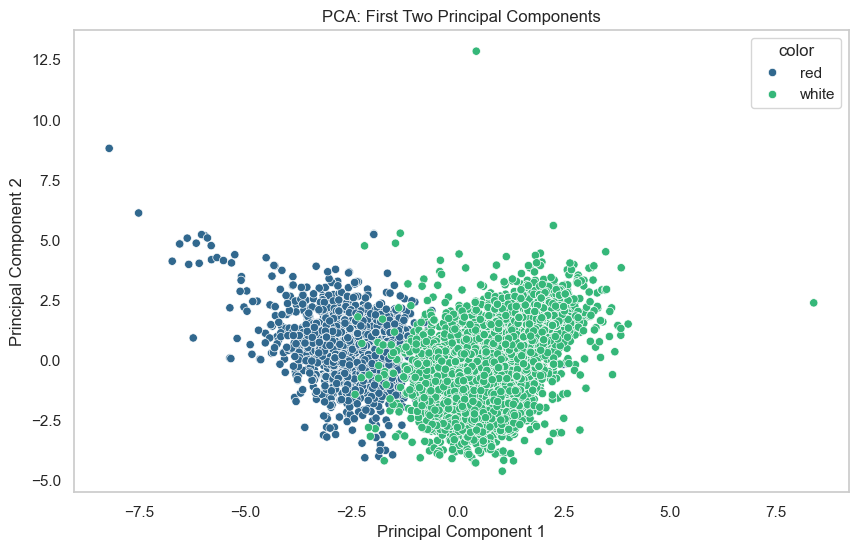

In [123]:
pca = PCA(n_components=3)
pca_data = pca.fit_transform(standardized_data)

pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2', 'PC3'])

wine_target = wine['color'] 

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue=wine_target, data=pca_df, palette='viridis')
plt.title('PCA: First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

#### tSNE

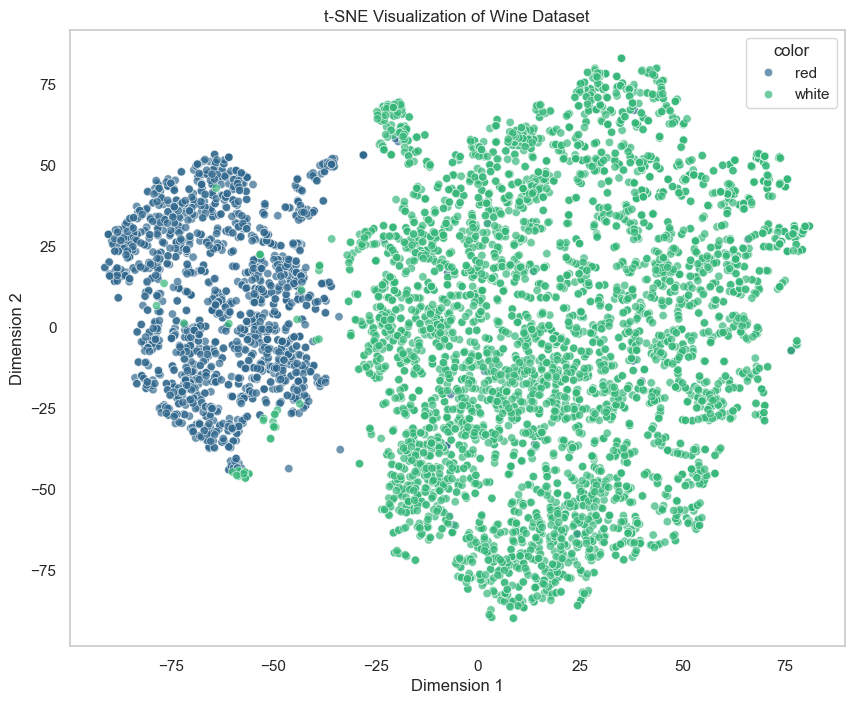

In [126]:
#### tSNE
n_samples = standardized_data.shape[0]
perplexity_value = min(30, n_samples - 1)

tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=0)
tsne_results = tsne.fit_transform(standardized_data)

tsne_df = pd.DataFrame(data=tsne_results, columns=['Dimension 1', 'Dimension 2'])

plt.figure(figsize=(10, 8))
sns.scatterplot(x='Dimension 1', y='Dimension 2', hue = wine['color'], data=tsne_df, palette='viridis', alpha=0.7)
plt.title('t-SNE Visualization of Wine Dataset')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid()
plt.show()

t-NSE does a better job at distinguinshing between red and white wine since it plot shows clearer, more separated clusters 

## Market segmentation

In [3]:
social_mkt = pd.read_csv('social_marketing.csv')
social_mkt.head()

Unnamed: 0  chatter  current_events  travel  photo_sharing  uncategorized  \
0  hmjoe4g3k        2               0       2              2              2   
1  clk1m5w8s        3               3       2              1              1   
2  jcsovtak3        6               3       4              3              1   
3  3oeb4hiln        1               5       2              2              0   
4  fd75x1vgk        5               2       0              6              1   

   tv_film  sports_fandom  politics  food  ...  religion  beauty  parenting  \
0        1              1         0     4  ...         1       0          1   
1        1              4         1     2  ...         0       0          0   
2        5              0         2     1  ...         0       1          0   
3        1              0         1     0  ...         0       1          0   
4        0              0         2     0  ...         0       0          0   

   dating  school  personal_fitness  fashion  small_business  spam  adult  
0       1       0                11        0               0     0      0  
1       1       4                 0        0               0     0      0  
2       1       0                 0        1               0     0      0  
3       0       0                 0        0               0     0      0  
4       0       0                 0        0               1     0      0  

[5 rows x 37 columns]

In [4]:
social_cleaned = social_mkt.drop('Unnamed: 0', axis=1)
corr_matrix = social_cleaned.corr()

First, I plotted bar plots for each of the columns to understand their distribution

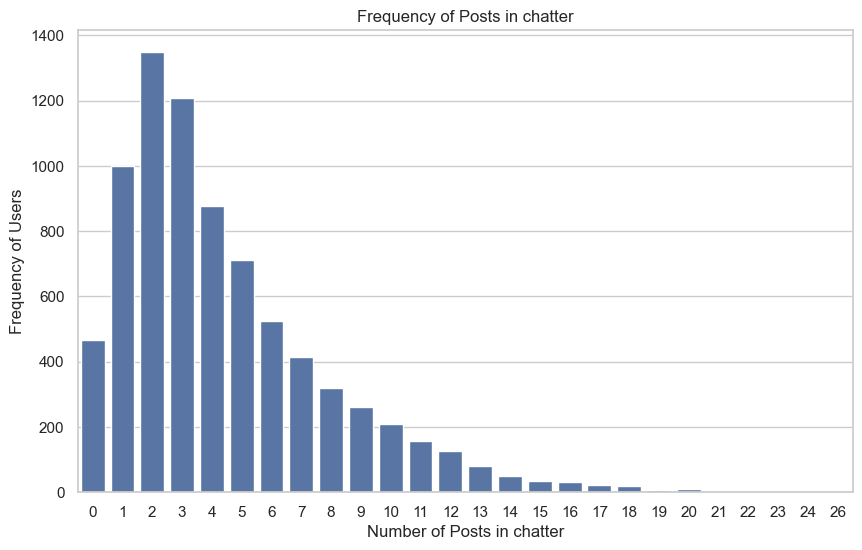

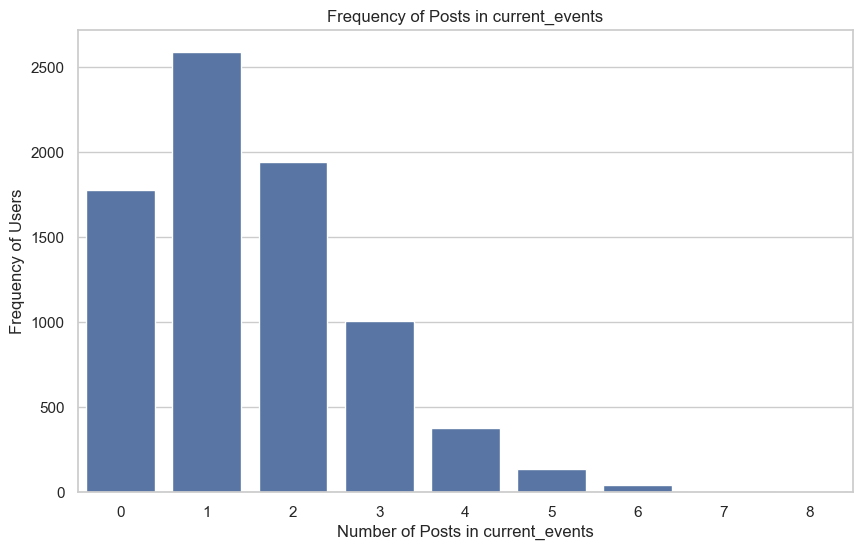

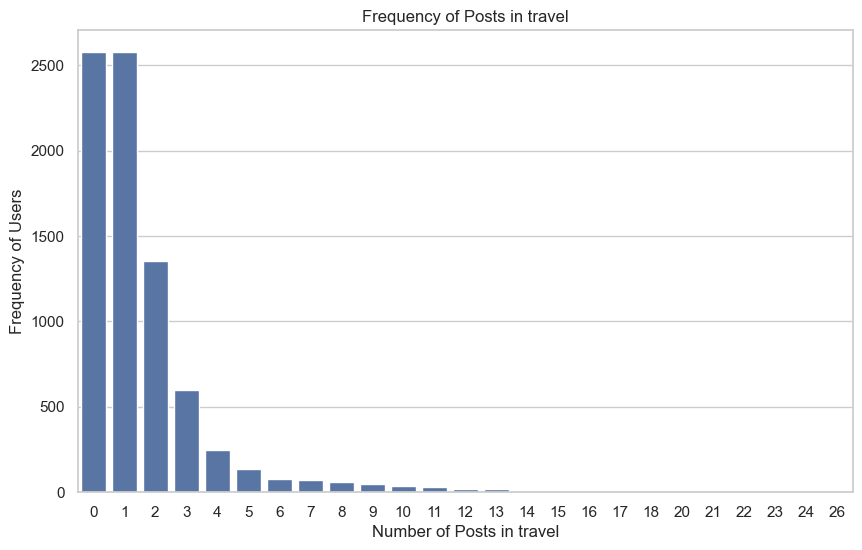

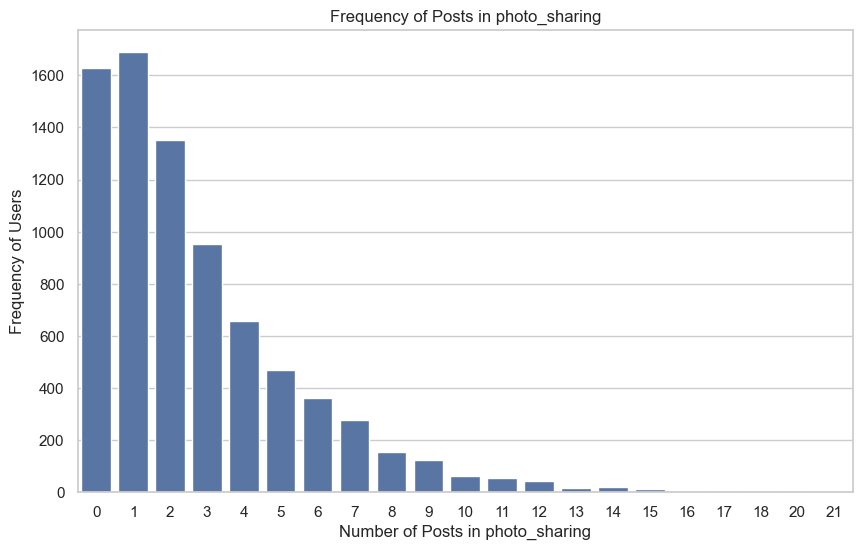

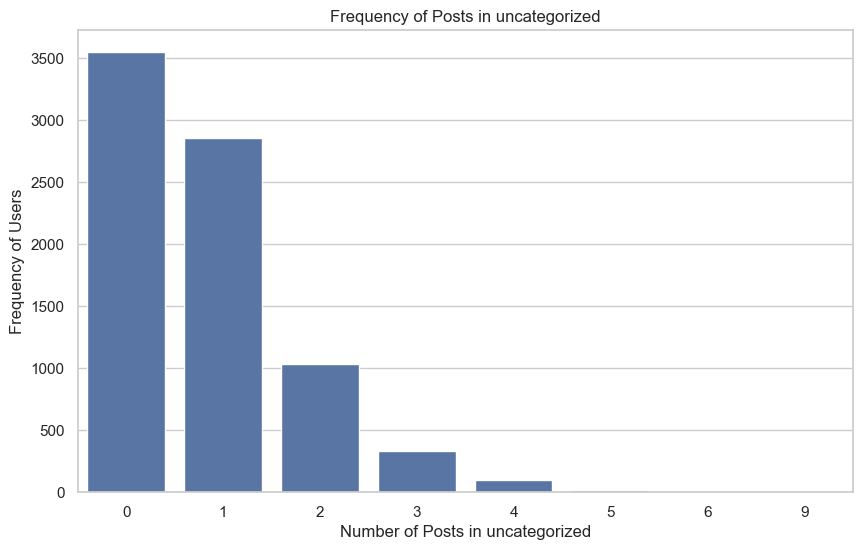

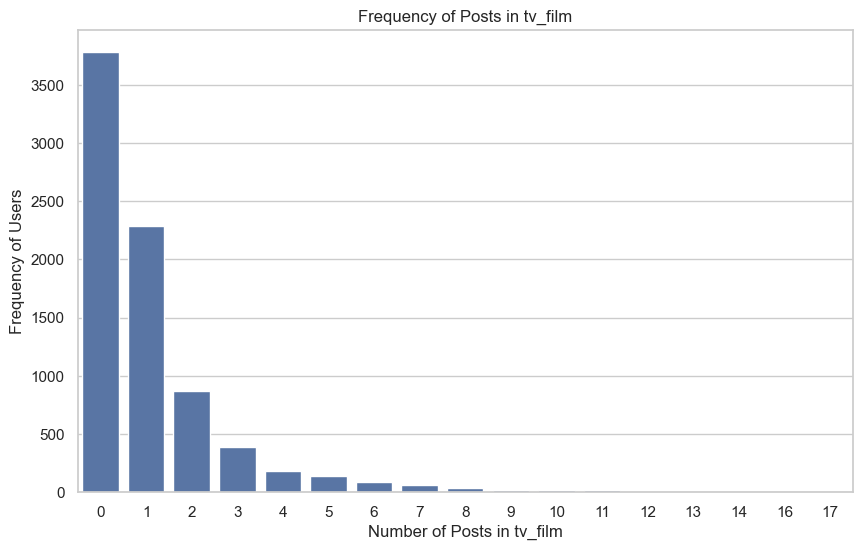

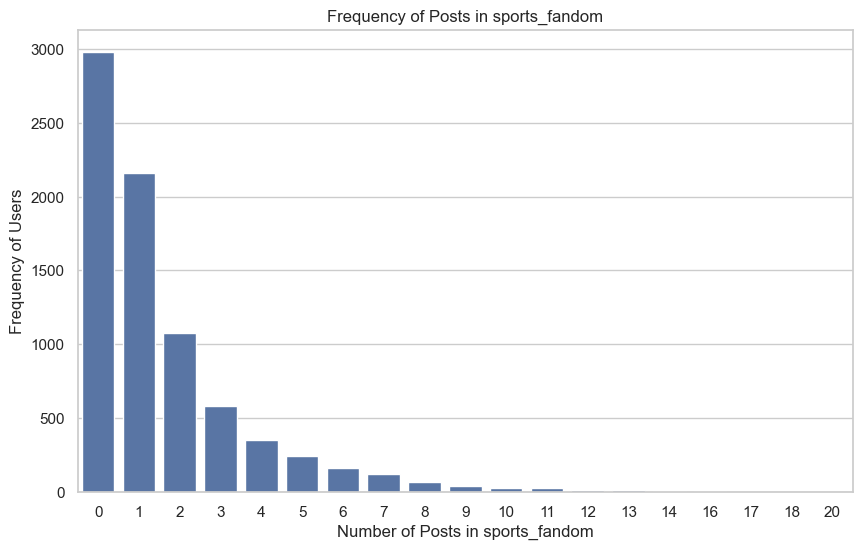

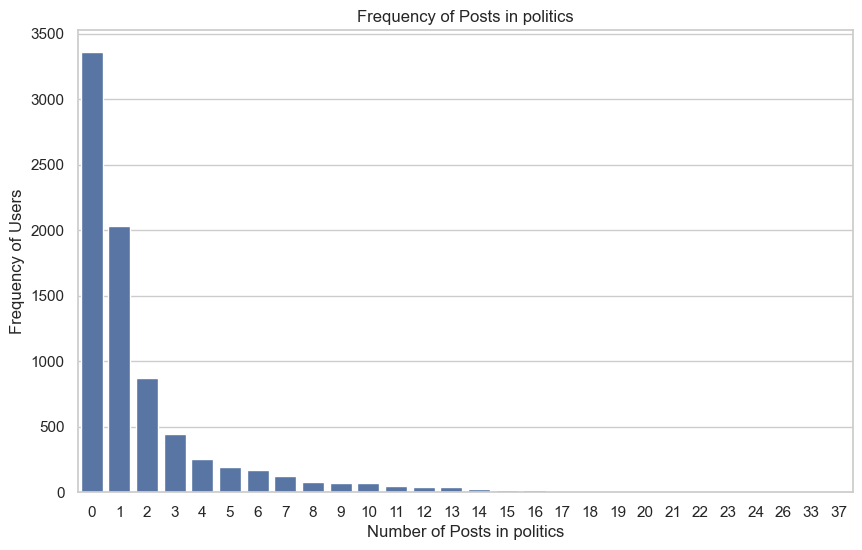

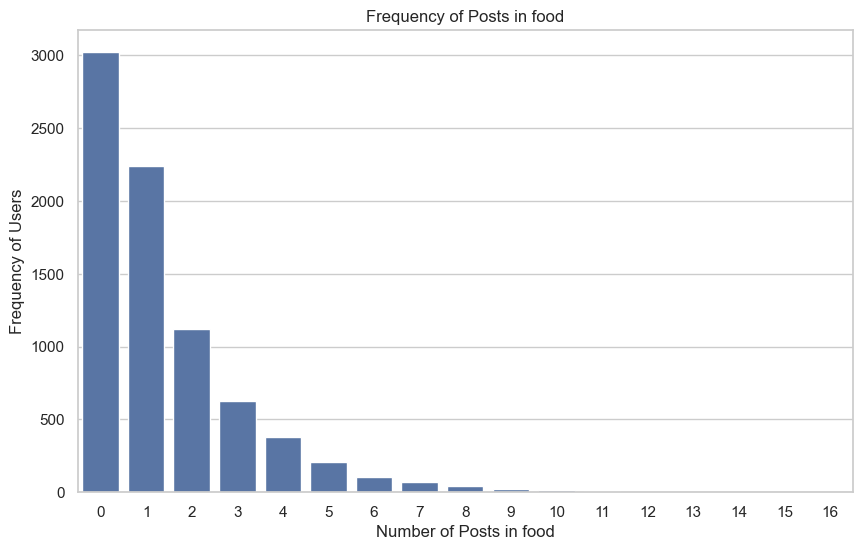

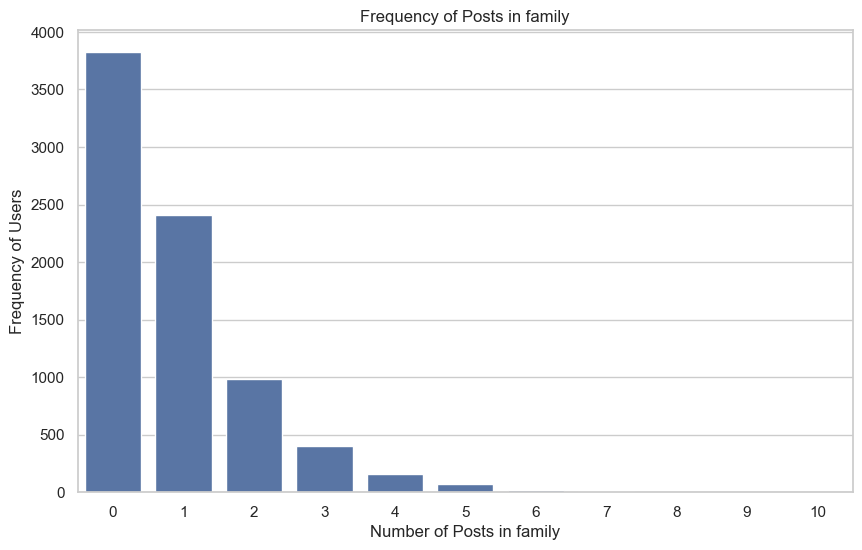

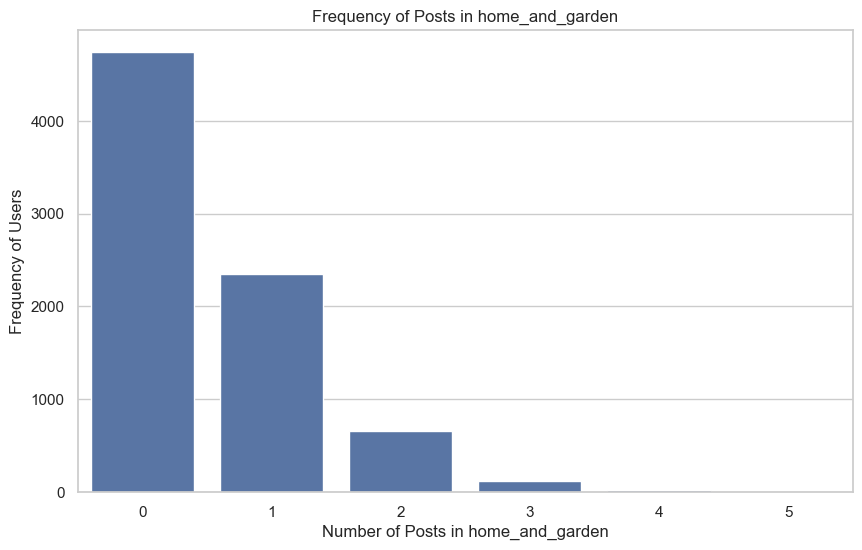

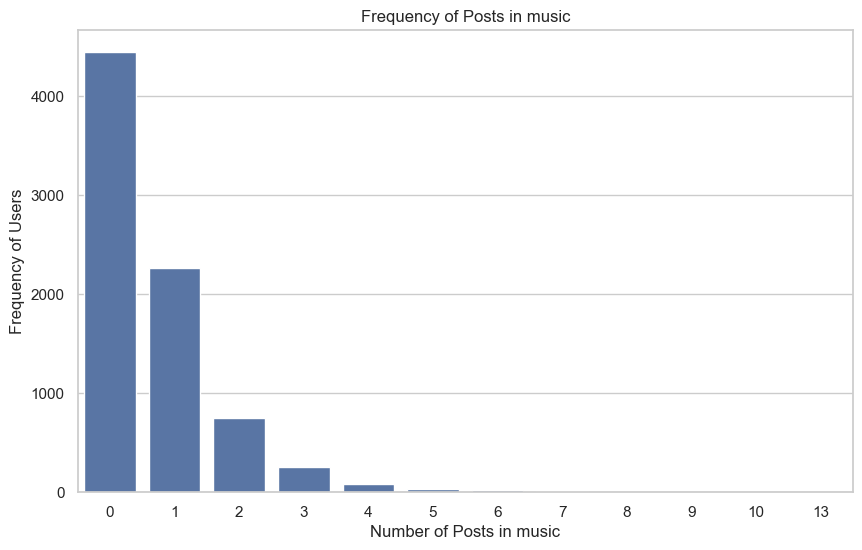

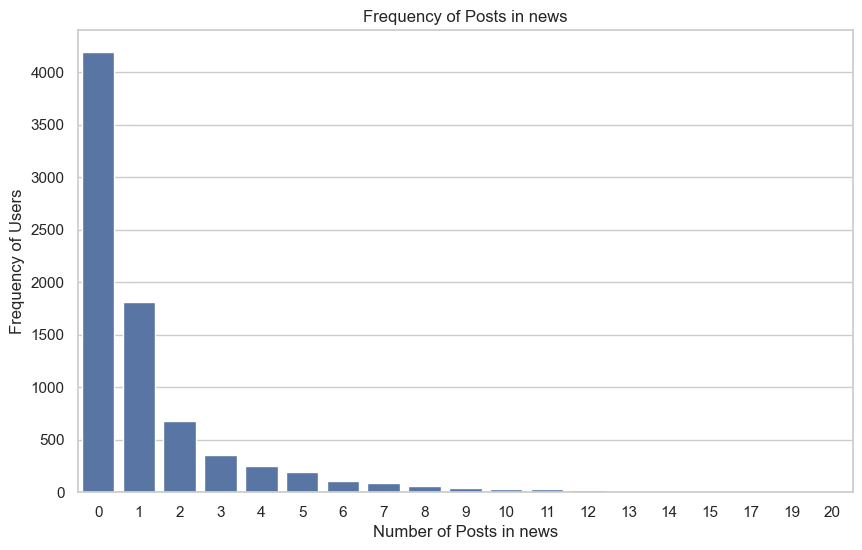

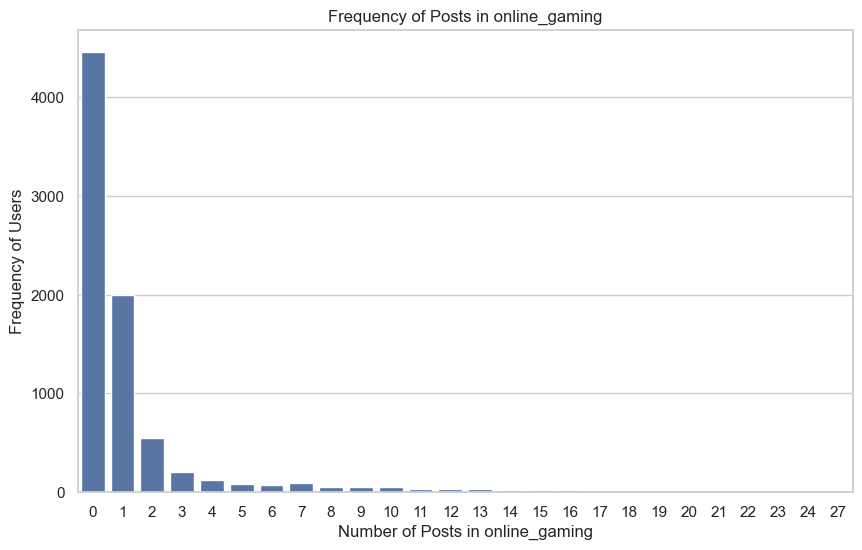

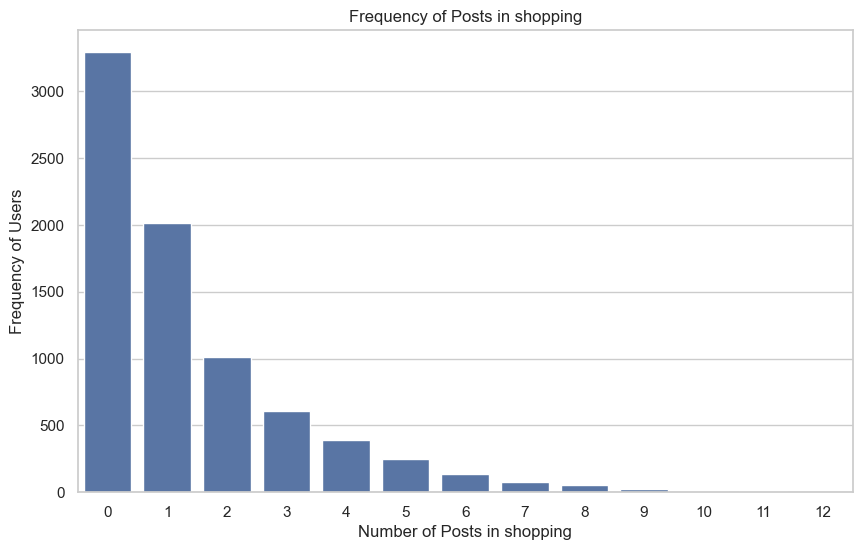

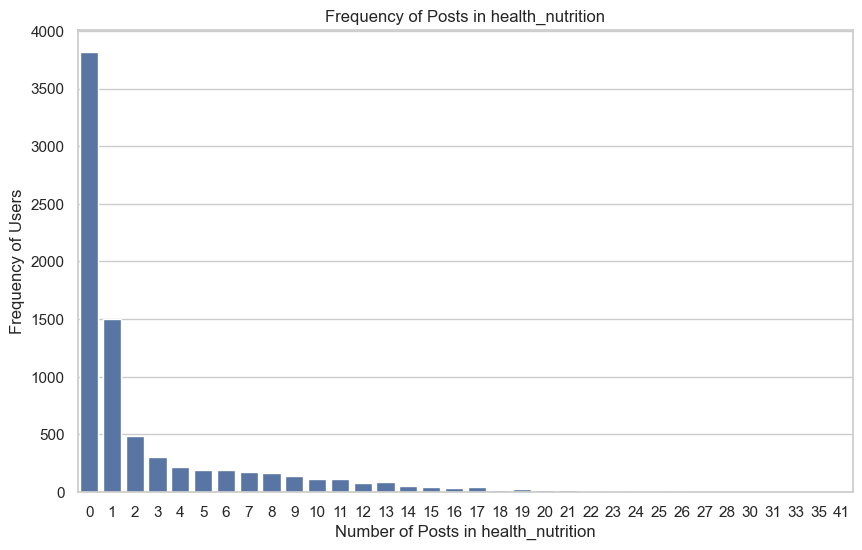

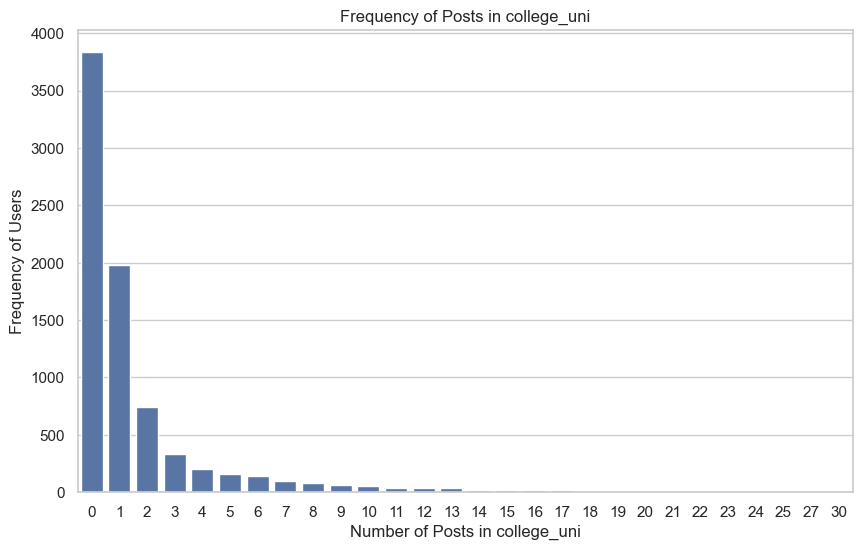

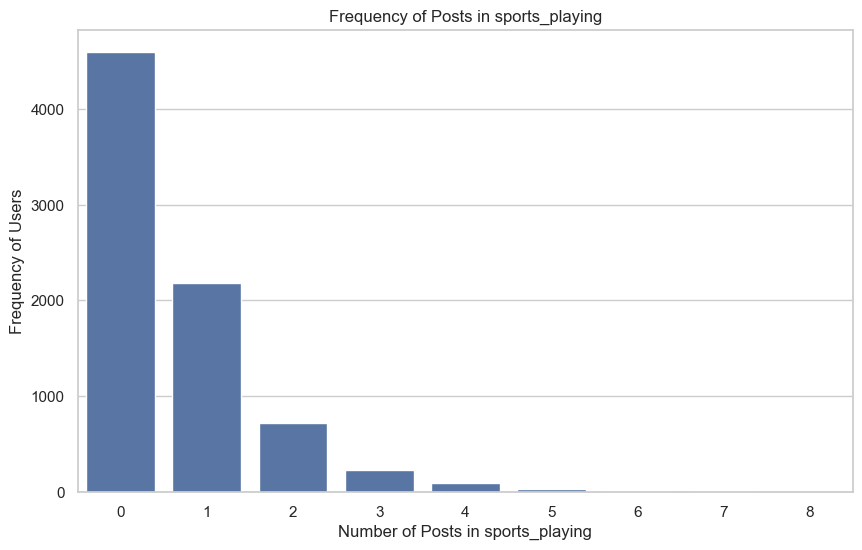

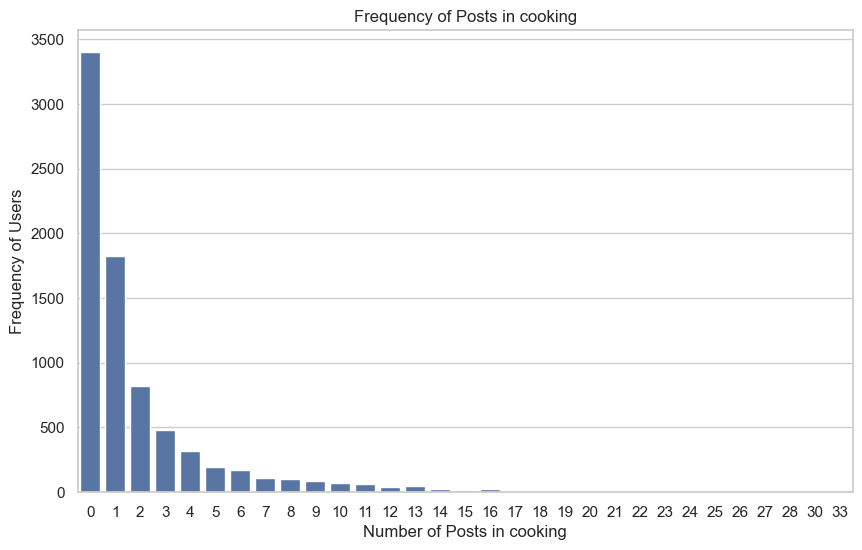

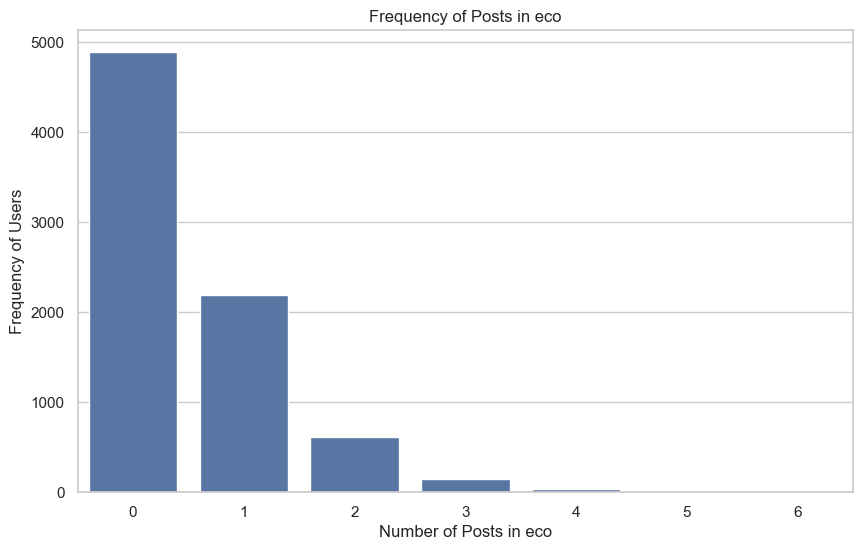

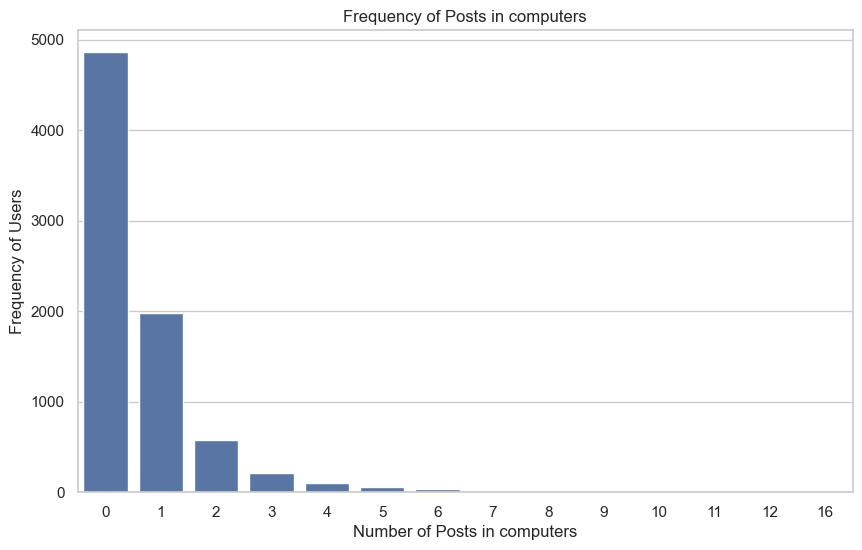

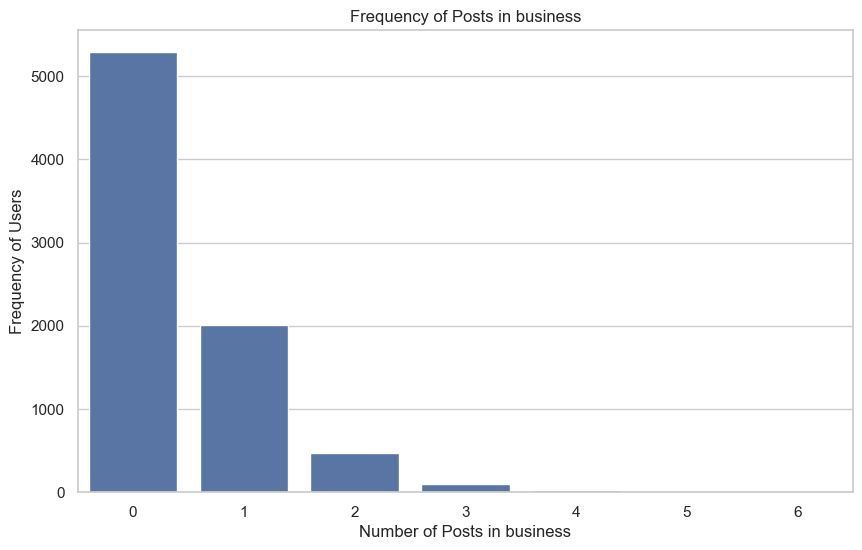

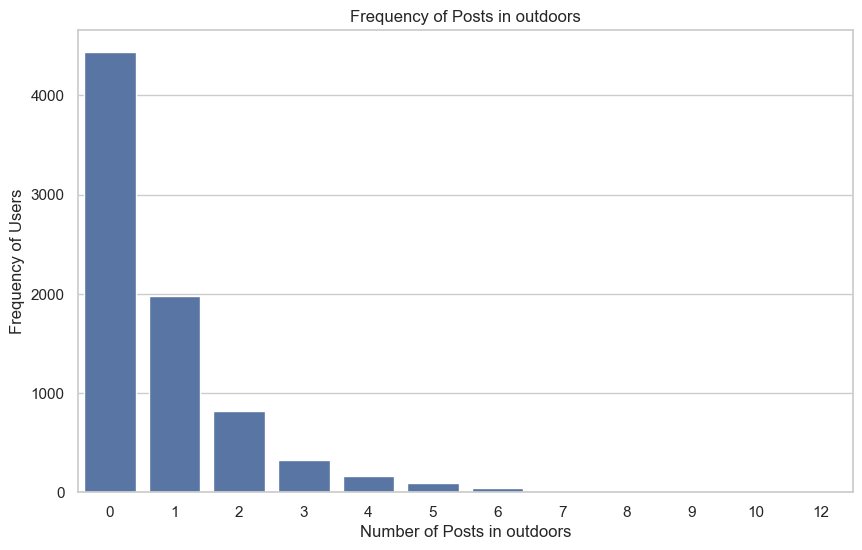

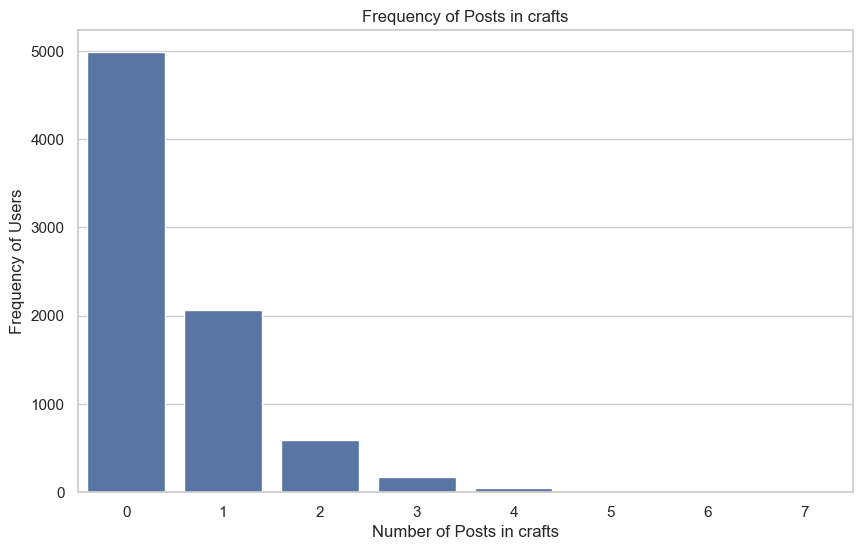

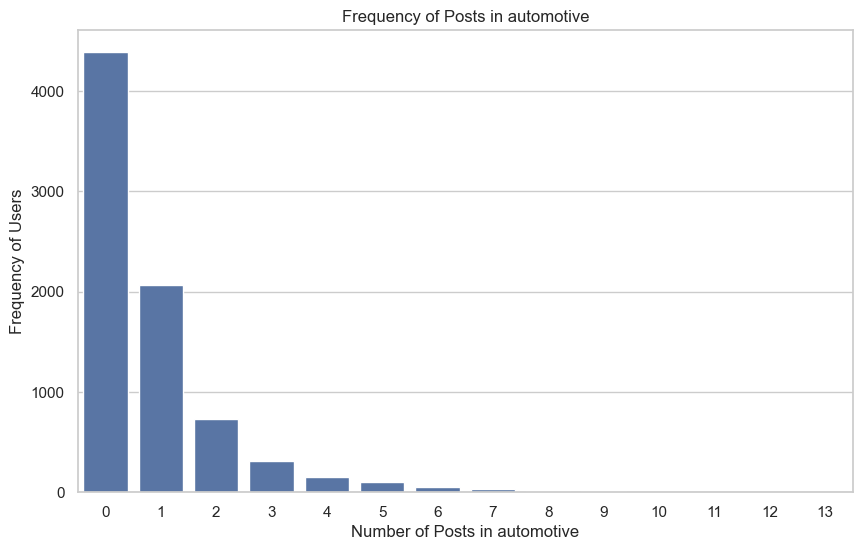

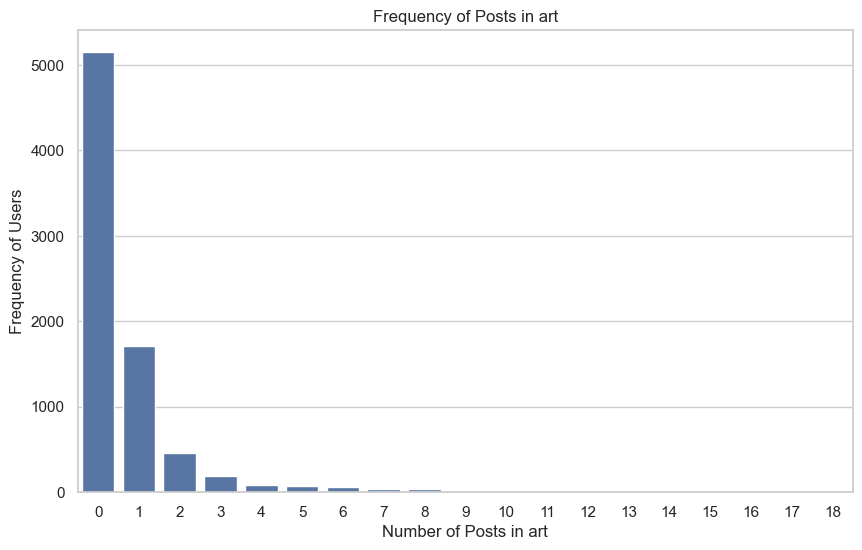

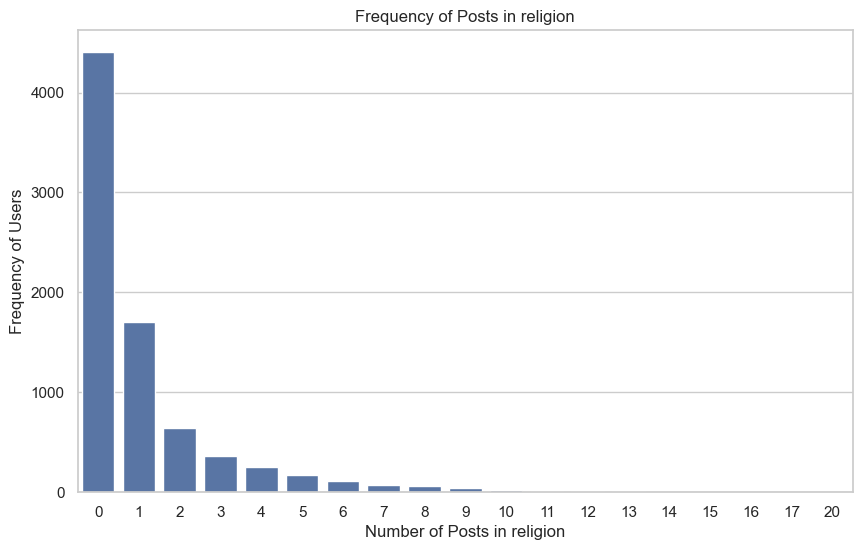

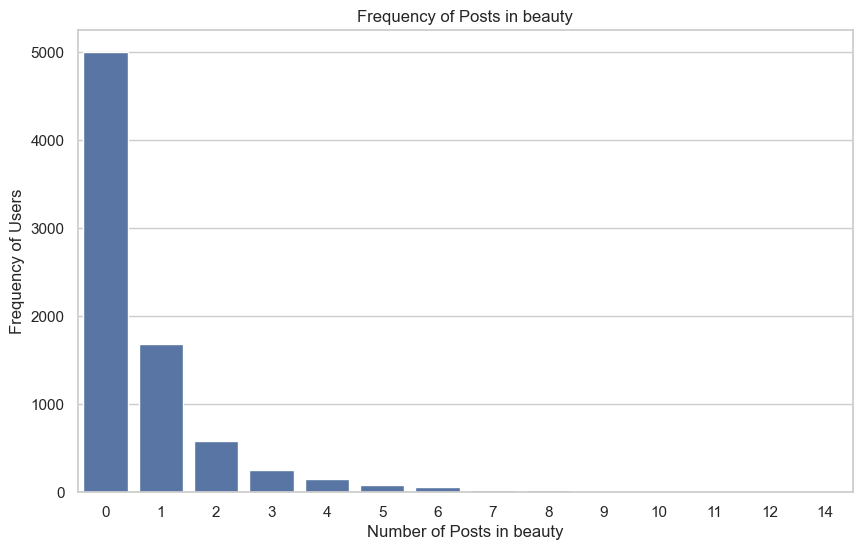

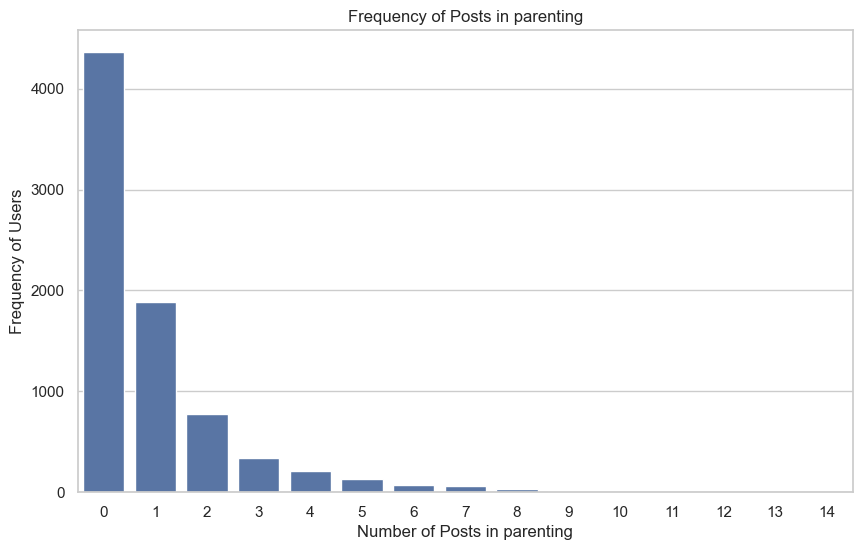

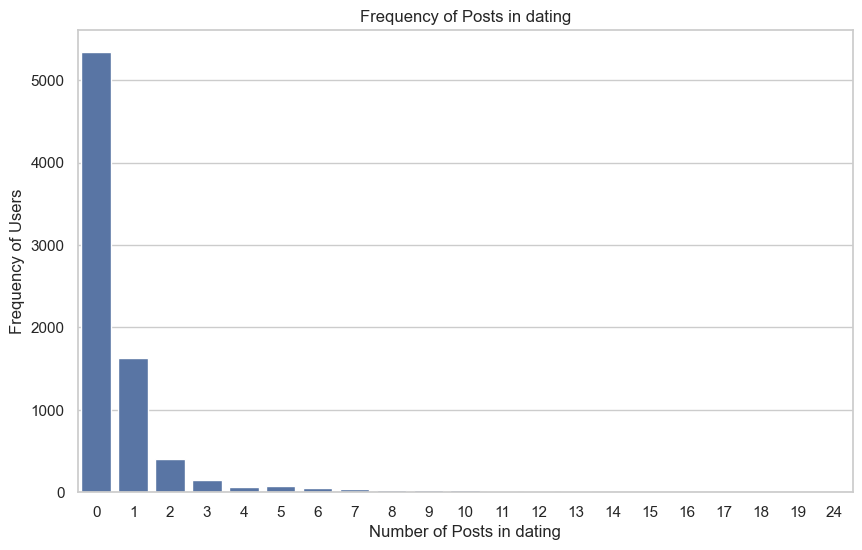

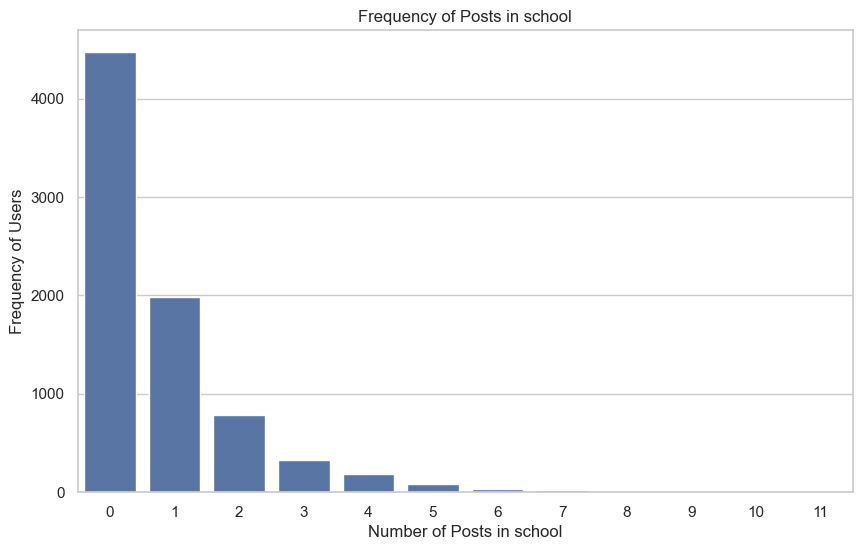

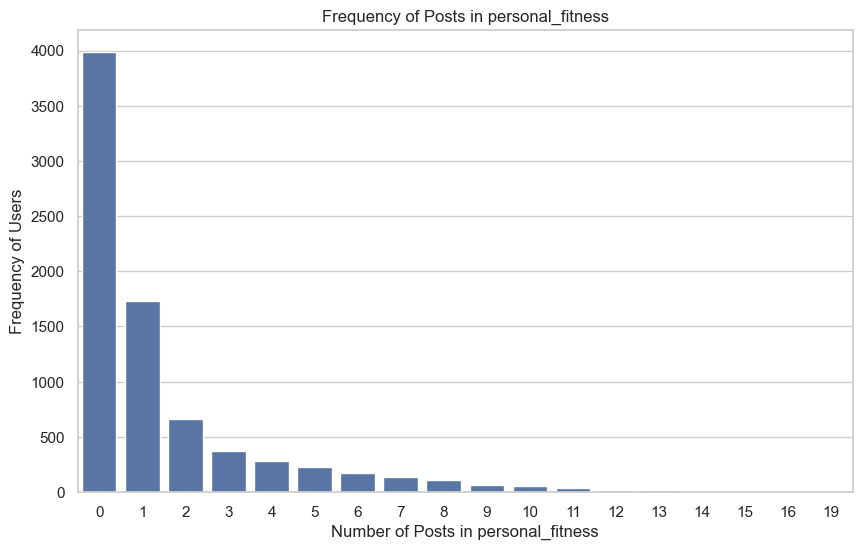

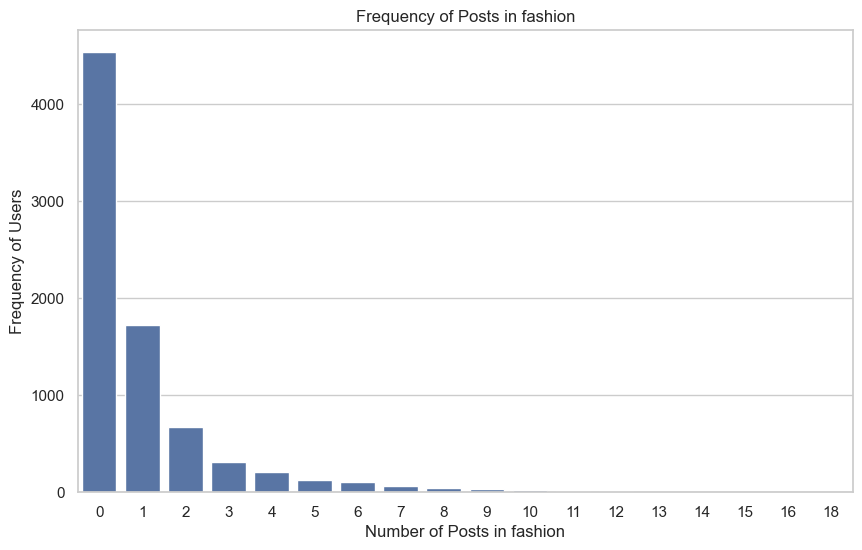

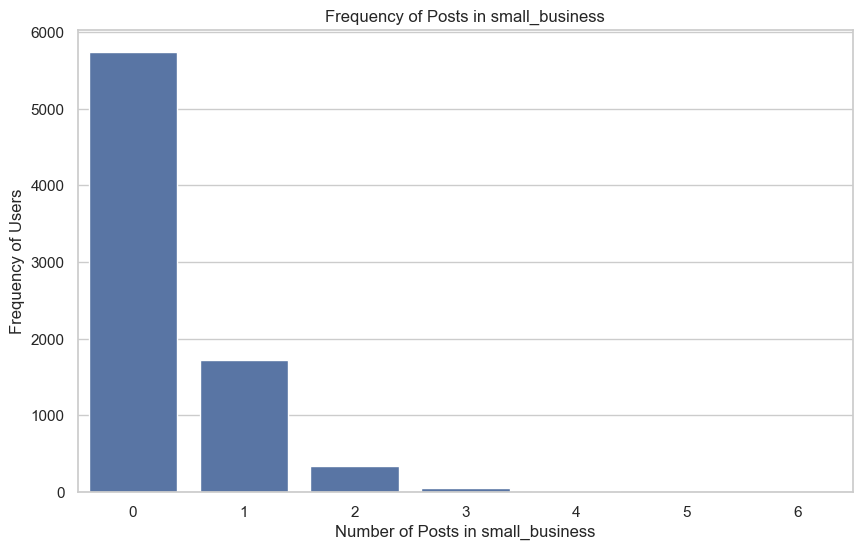

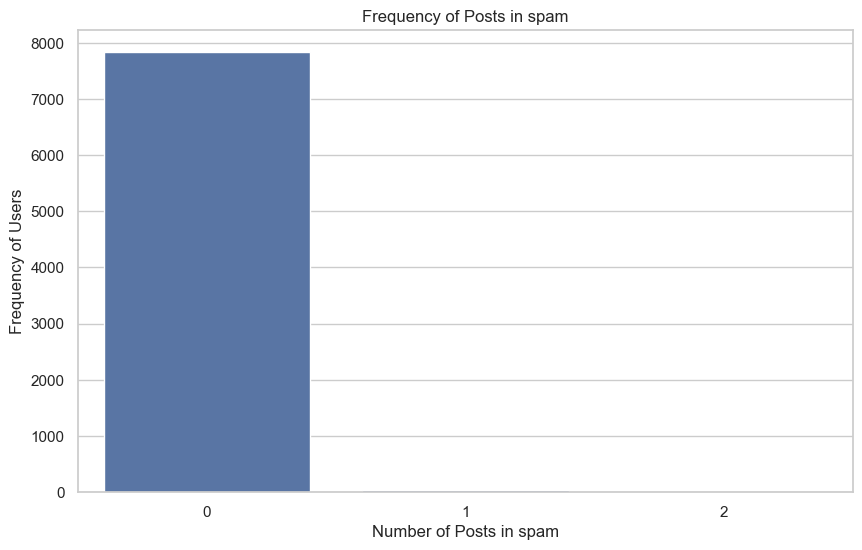

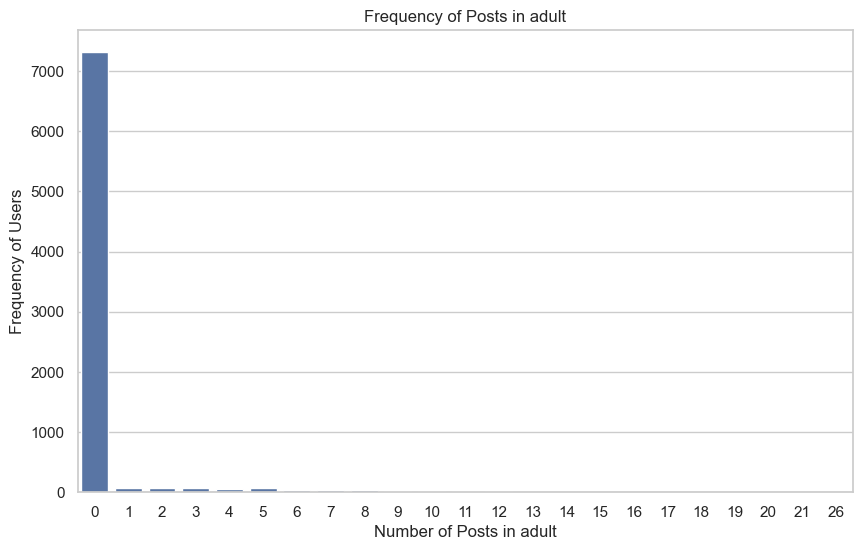

In [5]:
sns.set(style="whitegrid")

for column in social_cleaned.columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=social_cleaned[column].value_counts().index, y=social_cleaned[column].value_counts().values)
    plt.title(f'Frequency of Posts in {column}')
    plt.xlabel(f'Number of Posts in {column}')
    plt.ylabel('Frequency of Users')
    plt.show()



## PCA

Principal Component 1: 0.1924
Principal Component 2: 0.1336
Principal Component 3: 0.1038
Principal Component 4: 0.1013
Principal Component 5: 0.0926
Principal Component 6: 0.0735
Principal Component 7: 0.0324
Principal Component 8: 0.0292
Principal Component 9: 0.0276
Principal Component 10: 0.0236


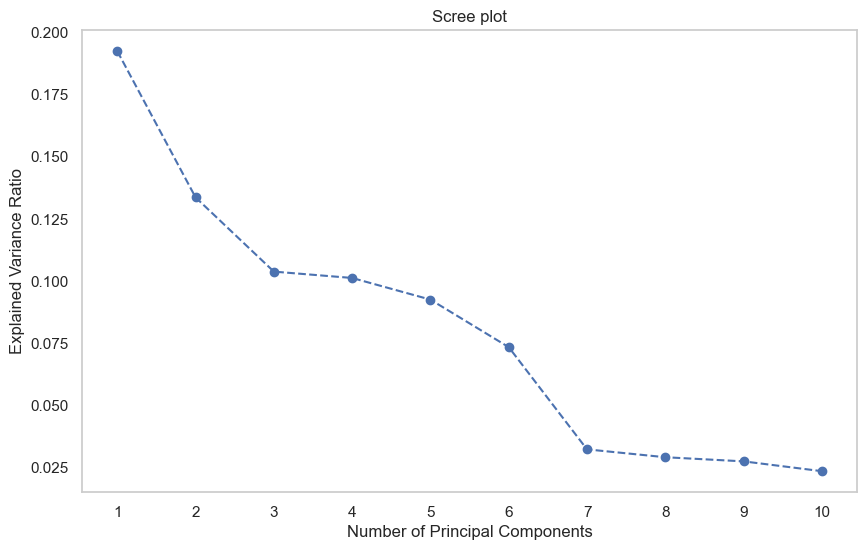

In [6]:
pca = PCA(n_components=10)
pca_data = pca.fit_transform(social_cleaned)

explained_variance = pca.explained_variance_ratio_

explained_variance_list = list(enumerate(explained_variance, start=1))

for component, variance in explained_variance_list:
    print(f'Principal Component {component}: {variance:.4f}')

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Scree plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid()
plt.show()

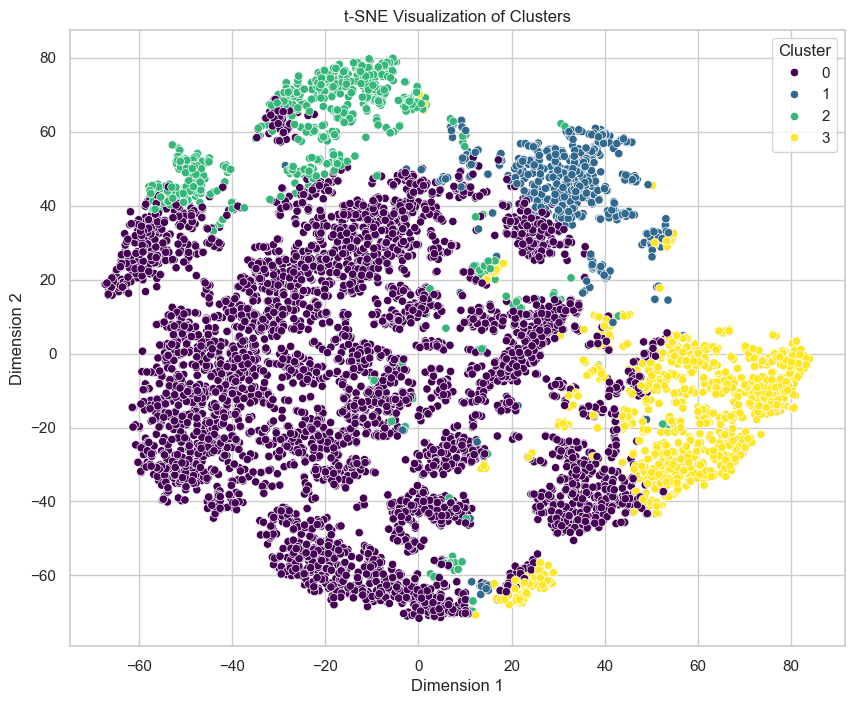

In [7]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(pca_data)

social_cleaned['Cluster'] = clusters

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_data = tsne.fit_transform(pca_data)
tsne_df = pd.DataFrame(data=tsne_data, columns=['Dimension 1', 'Dimension 2'])
tsne_df['Cluster'] = clusters

plt.figure(figsize=(10, 8))
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Cluster', data=tsne_df, palette='viridis')
plt.show()


In [8]:
cluster_summary = social_cleaned.groupby('Cluster').mean()

pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None)

cluster_summary

chatter  current_events    travel  photo_sharing  uncategorized  \
Cluster                                                                     
0        4.400037        1.477766  1.109335       2.375230       0.749908   
1        4.615905        1.712352  1.475465       6.079526       1.201354   
2        4.327470        1.682003  5.592693       2.461434       0.756428   
3        4.324324        1.561261  1.307207       2.628829       0.953153   

          tv_film  sports_fandom  politics      food    family  \
Cluster                                                          
0        1.060088       1.514517  0.954429  1.194046  0.816428   
1        1.049069       1.541455  1.333333  1.274112  0.998308   
2        1.174560       2.320704  9.031123  1.710419  0.993234   
3        1.062162       1.527928  1.299099  2.252252  0.938739   

         home_and_garden     music      news  online_gaming  shopping  \
Cluster                                                                 
0               0.477582  0.615950  0.708563       1.204153  1.332047   
1               0.619289  1.181049  1.015228       1.368866  1.927242   
2               0.604871  0.642760  5.098782       1.090663  1.320704   
3               0.623423  0.746847  1.151351       1.225225  1.429730   

         health_nutrition  college_uni  sports_playing    cooking       eco  \
Cluster                                                                       
0                0.918412     1.566887        0.590592   0.840316  0.423925   
1                1.967851     1.786802        0.903553  11.328257  0.573604   
2                1.313938     1.492558        0.679296   1.202977  0.594046   
3               11.804505     1.375676        0.709910   3.236937  0.858559   

         computers  business  outdoors    crafts  automotive       art  \
Cluster                                                                  
0         0.423374  0.370085  0.449283  0.458839    0.663910  0.686329   
1         0.749577  0.582064  0.807107  0.639594    0.922166  0.944162   
2         2.330176  0.638701  0.872801  0.640054    2.166441  0.714479   
3         0.582883  0.455856  2.344144  0.646847    0.704505  0.803604   

         religion    beauty  parenting    dating    school  personal_fitness  \
Cluster                                                                        
0        1.044469  0.439177   0.852444  0.612459  0.722896          0.654539   
1        1.240271  3.712352   1.064298  0.654822  1.045685          1.291032   
2        1.334235  0.516915   1.193505  1.008119  0.891746          0.878214   
3        1.109009  0.533333   1.001802  1.025225  0.756757          5.900901   

          fashion  small_business      spam     adult  
Cluster                                                
0        0.589122        0.316060  0.006799  0.447446  
1        5.463621        0.480541  0.003384  0.397631  
2        0.680650        0.456022  0.005413  0.223275  
3        0.826126        0.279279  0.007207  0.309910

#### The goal of this analysis was to identify key segments within NutrientH20’s social media audience based on Twitter activity, helping the brand tailor its marketing strategy more effectively.

Principal Component Analysis (PCA) was used to reduce the data's complexity while retaining key patterns. The analysis indicated that the first four components captured most of the variance, leading us to focus on these components. 
Follwing this, clustering was performed on the reduced data, resulting in four distinct audience segments. These clusters were visualized using t-SNE, which demonstrated clear groupings of users with similar interests.

#### Key Market Segments Identified:

Cluster 0: 

- Interests: Photosharing, sports fandom, and college/university.
- Insights: This group is dominated by younger, highly engaged users, often sharing photos and engaging in discussions about sports and campus life. They could be prime targets for lifestyle and athletic product promotions.

Cluster 1:

- Interests: Photosharing, cooking, and fashion.
- Insights: These users show a keen interest in fashion and culinary trends, often sharing visual content. They are likely receptive to visually appealing content and influencer partnerships focused on food and fashion.

Cluster 2:

- Interests: Travel, politics, and news.
- Insights: This group is primarily composed of informed individuals who are interested in staying up-to-date on global issues while also sharing travel experiences. Content related to travel, eco-conscious living, or global health issues might resonate with them.

Cluster 3:

- Interests: Health/nutrition, cooking, and personal fitness.
- Insights: This segment focuses heavily on personal well-being, nutrition, and fitness. They are ideal candidates for campaigns promoting health-oriented products, meal planning guides, or fitness challenges.

Strategic Recommendations:

Segment-Based Campaigns: NutrientH20 should tailor its messaging and content for each segment. For instance:

- Cluster 0: Engage with athletic challenges, sports sponsorships, and content that ties into college culture.
- Cluster 1: Utilize visual storytelling and influencer partnerships centered on food styling and trendy fashion.
- Cluster 2: Share thought leadership pieces, sustainability initiatives, and travel-related content that aligns with this audience’s values.
- Cluster 3: Promote health benefits, new nutritional products, and fitness programs.

Content Customization: Given the strong interest in photosharing across multiple clusters, visually-driven content (e.g., high-quality images, infographics, and short videos) should be a primary focus for all segments.


## The Reuters corpus

In [3]:
import nltk
import random
import os
import re
import numpy as np
import pandas as pd
from collections import Counter
from nltk.corpus import reuters, stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
data_dir = "./data/"
if not os.path.exists(data_dir):
    os.makedirs(data_dir)  # Create the directory if it doesn't exist

nltk.data.path.append(os.path.abspath(data_dir))

nltk.download('reuters', download_dir=data_dir)
nltk.download('stopwords', download_dir=data_dir)


[nltk_data] Downloading package reuters to ./data/...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package stopwords to ./data/...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
import zipfile
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

print(os.getcwd())

zip_file_path = 'dpuelz STA380 master data-ReutersC50.zip'

extract_path = 'extracted_files/'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


/Users/ashleypaolasotogarcia


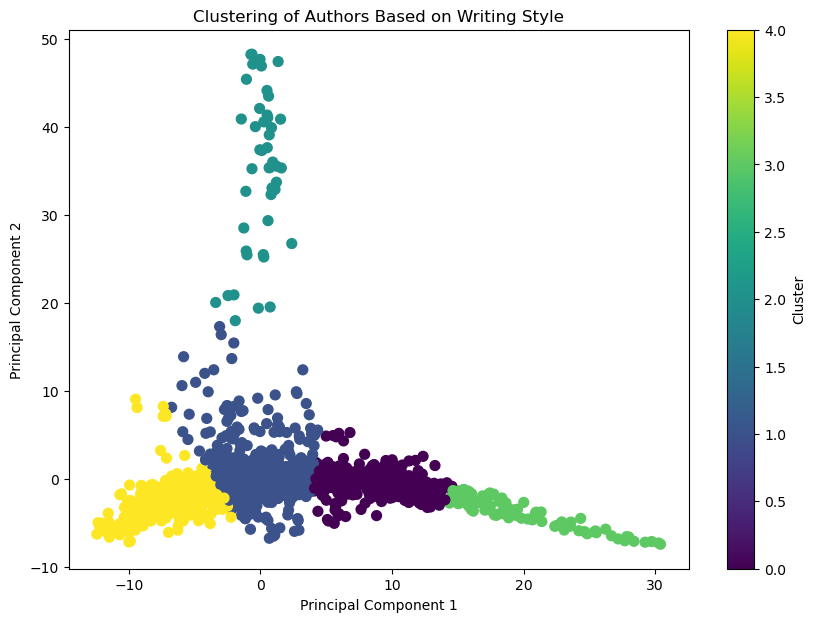

In [4]:
train_directory = os.path.join(extract_path, 'C50train')

def load_data(directory):
    data = []
    labels = []
    for author in os.listdir(directory):
        author_dir = os.path.join(directory, author)
        if os.path.isdir(author_dir):
            for file in os.listdir(author_dir):
                file_path = os.path.join(author_dir, file)
                with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
                    content = f.read()
                    data.append(content)
                    labels.append(author)
    return data, labels

data, labels = load_data(train_directory)

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)  # Adjust max_features as needed
X = vectorizer.fit_transform(data).toarray()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)  
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=5, random_state=42) 
clusters = kmeans.fit_predict(X_pca)

plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering of Authors Based on Writing Style')
plt.colorbar(label='Cluster')
plt.show()

Interpretation:

- Overlapping Regions: While some clusters (like the yellow and blue clusters) are more tightly grouped and separate, others have overlapping regions. The overlapping areas indicate that certain authors or styles have similarities, making it harder to fully distinguish between them.
- Cluster Spread: The yellow cluster is more compact and concentrated towards the left of the plot, indicating a more uniform writing style among the authors in that cluster. In contrast, the green and purple clusters are spread out, suggesting more variability in writing styles within those groups.


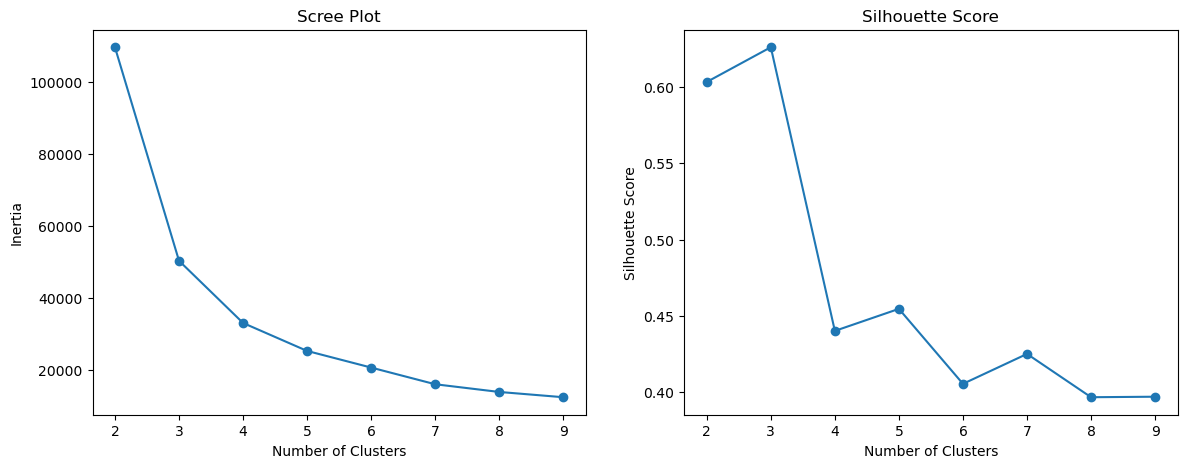

In [5]:
from sklearn.metrics import silhouette_score

inertia = []
silhouette_scores = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X_pca)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_pca, clusters))

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].plot(range(2, 10), inertia, marker='o')
ax[0].set_title('Scree Plot')
ax[0].set_xlabel('Number of Clusters')
ax[0].set_ylabel('Inertia')

ax[1].plot(range(2, 10), silhouette_scores, marker='o')
ax[1].set_title('Silhouette Score')
ax[1].set_xlabel('Number of Clusters')
ax[1].set_ylabel('Silhouette Score')

plt.show()


Interpretation:

- Scree Plot: the “elbow” is around 3 clusters, suggesting that only 3 clusters should be kept. 
- Silhouette Score Plot: The Silhouette Score peaks at 3 clusters with a score above 0.6, indicating that the clusters are well-defined and well-separated at this level. After 3 clusters, the score drops significantly, suggesting that increasing the number of clusters decreases the quality of clustering.


In [6]:
for i in range(3):  # Assuming 5 clusters
    cluster_indices = [index for index, label in enumerate(clusters) if label == i]
    top_words = np.mean(X[cluster_indices], axis=0)
    sorted_indices = np.argsort(top_words)[::-1][:10]  # Get top 10 words
    print(f"Cluster {i}: {', '.join([vectorizer.get_feature_names_out()[index] for index in sorted_indices])}")


Cluster 0: china, hong, kong, beijing, said, chinese, taiwan, party, tibet, tung
Cluster 1: said, percent, million, company, market, year, billion, new, analysts, share
Cluster 2: gm, uaw, workers, plants, plant, strike, parts, automaker, union, yokich


- Cluster 0: This cluster appears to focus on China and other Asian Coutries.  
- Cluster 1: The keywords suggest that this cluster is related to finance, economics, and market trends.
- Cluster 2: This cluster is focused on the automotive industry, particularly the relationships between companies like GM (General Motors), workers, unions, and strikes. 


#### The goal of the exercise was to determine whether documents from different authors could be clustered based on writing style and thematic content, using a combination of TF-IDF, PCA, and K-Means clustering.

#### Clustering Visualization 
The scatter plot of documents, reduced to two principal components using PCA, revealed distinct clusters, indicating that the algorithm successfully identified meaningful groupings of similar writing styles or thematic content. Some clusters were tightly grouped, indicating uniformity in style, while others showed more variance, suggesting greater diversity within those groups.

#### Elbow Method and Silhouette Score Analysis
Both the Elbow Method and the Silhouette Score suggest that 3 clusters is the optimal choice for this dataset. After 3 clusters we can see a drastic drop in inertia/score, which indicated that a higher number of clusters would decrease the quality of clustering. 

#### Top Words in Each Cluster
The most frequent words in each cluster provided insights into the thematic content of the documents:
- Cluster 0 focused on topics related to China and other Asian contries
- Cluster 1 centered around financial topics emphasizing market analysis and corporate financial results.
- Cluster 2: Highlighted documents related to the automotive industry, particularly labor relations and union activities.

#### Conclusion 
The analysis reveals key themes and similarities among documents authored by different people, offering insights into content categorization, topic modeling, and potentially authorship attribution.
In a real-world application, this approach could be used to automatically categorize news articles, identify content trends, or distinguish between different authors’ writing styles in large text corpora.




## Image classification with neural networks

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms, models
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
import zipfile
import os
import torchvision

In [6]:
print(os.getcwd())

zip_file_path = 'jgscott STA380 master data-EuroSAT_RGB.zip'

extract_path = 'extracted_files/EuroSAT_RGB/'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


/Users/ashleypaolasotogarcia


In [7]:
transform = transforms.Compose([
    transforms.Resize((64, 64)),  # Resize to 64x64
    transforms.ToTensor(),  # Convert the images to PyTorch tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalize
])

dataset = datasets.ImageFolder(root=extract_path, transform=transform)

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

model = models.resnet18(pretrained=True)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, len(dataset.classes))  # Adjust the final layer to match the number of classes

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

num_epochs = 10
train_loss_history = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    epoch_loss = running_loss / len(train_loader)
    train_loss_history.append(epoch_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')

model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

accuracy = accuracy_score(all_labels, all_preds)
print(f'Test Set Accuracy: {accuracy * 100:.2f}%')


/Users/ashleypaolasotogarcia/Desktop/anaconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/ashleypaolasotogarcia/Desktop/anaconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/10], Loss: 0.4891
Epoch [2/10], Loss: 0.2793



KeyboardInterrupt



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


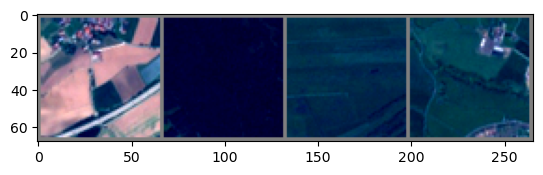

Predicted:  Highway Forest Forest Pasture


NameError: name 'all_labels' is not defined

In [12]:
def imshow(img):
    img = img / 2 + 0.5  
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(test_loader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images[:4]))
predicted = model(images.to(device)).argmax(1)
print('Predicted: ', ' '.join(f'{dataset.classes[predicted[j]]}' for j in range(4)))

cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=dataset.classes, yticklabels=dataset.classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
